# Package Installation

In [1]:
pip install mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
from mplsoccer import add_image, FontManager, Pitch
from scipy.ndimage import gaussian_filter

# Data Preparation

In [3]:
raw = '''{"shotmap":[{"player":{"name":"Shea Lacey","slug":"shea-lacey","shortName":"S. Lacey","position":"M","jerseyNumber":"61","userCount":3316,"gender":"M","id":1465865,"fieldTranslations":{"nameTranslation":{"ar":"\u0634\u064a\u0627 \u0644\u0627\u064a\u0633\u064a"},"shortNameTranslation":{"ar":"\u0634. \u0644\u0627\u064a\u0633\u064a"}}},"isHome":false,"shotType":"miss","situation":"assisted","playerCoordinates":{"x":28.2,"y":59.1,"z":0},"bodyPart":"left-foot","goalMouthLocation":"close-high-right","goalMouthCoordinates":{"x":0,"y":41,"z":45.8},"xg":0.016664711758494,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471728,"time":90,"addedTime":5,"timeSeconds":5690,"draw":{"start":{"x":59.1,"y":28.2},"end":{"x":59,"y":0},"goal":{"x":59,"y":54.2}},"reversedPeriodTime":1,"reversedPeriodTimeSeconds":610,"periodTimeSeconds":290,"incidentType":"shot"},{"player":{"name":"Kobbie Mainoo","firstName":"Kobbie","lastName":"Mainoo","slug":"kobbie-mainoo","shortName":"K. Mainoo","position":"M","jerseyNumber":"37","userCount":53742,"gender":"M","sofascoreId":"KobbieM","id":1142175,"fieldTranslations":{"nameTranslation":{"ar":"\u0643\u0648\u0628\u064a \u0645\u0627\u064a\u0646\u0648","hi":"\u0915\u094b\u092c\u0940 \u092e\u0948\u0928\u0942","bn":"\u0995\u09cb\u09ac\u09bf \u09ae\u09be\u0987\u09a8\u09c1"},"shortNameTranslation":{"ar":"\u0643. \u0645\u0627\u064a\u0646\u0648","hi":"\u0915\u0947. \u092e\u0948\u0928\u0942","bn":"\u0995\u09c7. \u09ae\u09be\u0987\u09a8\u09c1"}}},"isHome":false,"shotType":"miss","situation":"regular","playerCoordinates":{"x":26.9,"y":38.5,"z":0},"bodyPart":"right-foot","goalMouthLocation":"high","goalMouthCoordinates":{"x":0,"y":52.6,"z":79.2},"xg":0.019169855862856,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471725,"time":88,"timeSeconds":5239,"draw":{"start":{"x":38.5,"y":26.9},"end":{"x":47.4,"y":0},"goal":{"x":47.4,"y":20.8}},"reversedPeriodTime":3,"reversedPeriodTimeSeconds":161,"periodTimeSeconds":2539,"incidentType":"shot"},{"player":{"name":"Diogo Dalot","firstName":"","lastName":"","slug":"diogo-dalot","shortName":"D. Dalot","position":"M","jerseyNumber":"2","userCount":22718,"gender":"M","sofascoreId":"DDalot","id":843200,"fieldTranslations":{"nameTranslation":{"ar":"\u062f\u064a\u0648\u063a\u0648 \u062f\u0627\u0644\u0648\u062a","hi":"\u0921\u093f\u0913\u0917\u094b \u0921\u093e\u0932\u094b\u0924","bn":"\u09a1\u09bf\u0993\u0997\u09cb \u09a1\u09be\u09b2\u099f"},"shortNameTranslation":{"ar":"\u062f. \u062f\u0627\u0644\u0648\u062a","hi":"\u0921\u0940. \u0921\u093e\u0932\u094b\u0924","bn":"\u09a1\u09bf. \u09a1\u09be\u09b2\u099f"}}},"isHome":false,"shotType":"block","situation":"assisted","playerCoordinates":{"x":24,"y":45.8,"z":0},"bodyPart":"right-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":51.2,"z":19},"blockCoordinates":{"x":20,"y":46.3,"z":0},"xg":0.028218051418662,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471723,"time":88,"timeSeconds":5237,"draw":{"start":{"x":45.8,"y":24},"block":{"x":46.3,"y":20},"end":{"x":48.8,"y":0},"goal":{"x":48.8,"y":81}},"reversedPeriodTime":3,"reversedPeriodTimeSeconds":163,"periodTimeSeconds":2537,"incidentType":"shot"},{"player":{"name":"Joshua Zirkzee","slug":"joshua-zirkzee","shortName":"J. Zirkzee","position":"F","jerseyNumber":"11","userCount":26389,"gender":"M","sofascoreId":"JZirkzee","id":917007,"fieldTranslations":{"nameTranslation":{"ar":"\u062c\u0648\u0634\u0648\u0627 \u0632\u064a\u0631\u0643\u0632\u064a","hi":"\u091c\u094b\u0936\u0941\u0906 \u091c\u093c\u093f\u0930\u094d\u0915\u091c\u093c\u0940","bn":"\u099c\u09cb\u09b6\u09c1\u09af\u09bc\u09be \u099c\u09bf\u09b0\u0995\u099c\u09bf"},"shortNameTranslation":{"ar":"\u062c. \u0632\u064a\u0631\u0643\u0632\u064a","hi":"\u091c\u0947. \u091c\u093c\u093f\u0930\u094d\u0915\u091c\u093c\u0940","bn":"\u099c\u09c7. \u099c\u09bf\u09b0\u0995\u099c\u09bf"}}},"isHome":false,"shotType":"miss","situation":"assisted","playerCoordinates":{"x":14.5,"y":34,"z":0},"bodyPart":"left-foot","goalMouthLocation":"close-right","goalMouthCoordinates":{"x":0,"y":41.2,"z":8.3},"xg":0.042847063392401,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471716,"time":85,"timeSeconds":5060,"draw":{"start":{"x":34,"y":14.5},"end":{"x":58.8,"y":0},"goal":{"x":58.8,"y":91.7}},"reversedPeriodTime":6,"reversedPeriodTimeSeconds":340,"periodTimeSeconds":2360,"incidentType":"shot"},{"player":{"name":"Shea Lacey","slug":"shea-lacey","shortName":"S. Lacey","position":"M","jerseyNumber":"61","userCount":3316,"gender":"M","id":1465865,"fieldTranslations":{"nameTranslation":{"ar":"\u0634\u064a\u0627 \u0644\u0627\u064a\u0633\u064a"},"shortNameTranslation":{"ar":"\u0634. \u0644\u0627\u064a\u0633\u064a"}}},"isHome":false,"shotType":"post","situation":"assisted","playerCoordinates":{"x":18.9,"y":68.1,"z":0},"bodyPart":"left-foot","goalMouthLocation":"high","goalMouthCoordinates":{"x":0,"y":53.3,"z":39.9},"xg":0.034365847706795,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471717,"time":85,"timeSeconds":5051,"draw":{"start":{"x":68.1,"y":18.9},"end":{"x":46.7,"y":0},"goal":{"x":46.7,"y":60.1}},"reversedPeriodTime":6,"reversedPeriodTimeSeconds":349,"periodTimeSeconds":2351,"incidentType":"shot"},{"player":{"name":"Marcus Edwards","firstName":"","lastName":"","slug":"edwards-marcus","shortName":"M. Edwards","position":"M","jerseyNumber":"10","userCount":2873,"gender":"M","id":795066,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u0643\u0648\u0633 \u0625\u062f\u0648\u0627\u0631\u062f\u0632"},"shortNameTranslation":{"ar":"\u0645. \u0625\u062f\u0648\u0627\u0631\u062f\u0632","hi":"\u090f\u092e. \u090f\u0921\u0935\u0930\u094d\u0921\u094d\u0938","bn":"\u098f\u09ae. \u098f\u09a1\u0993\u09af\u09bc\u09be\u09b0\u09cd\u09a1\u09b8"}}},"isHome":true,"shotType":"block","situation":"assisted","playerCoordinates":{"x":9.7,"y":70.5,"z":0},"bodyPart":"right-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":49,"z":19},"blockCoordinates":{"x":7.9,"y":66.8,"z":0},"xg":0.033516690135002,"xgot":0,"goalkeeper":{"name":"Senne Lammens","firstName":"","lastName":"","slug":"senne-lammens","shortName":"S. Lammens","position":"G","jerseyNumber":"31","userCount":25541,"gender":"M","id":964753,"fieldTranslations":{"nameTranslation":{"ar":"\u0633\u064a\u0646\u064a \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u0938\u0947\u0928\u0947 \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u09b8\u09c7\u09a8\u09c7 \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"},"shortNameTranslation":{"ar":"\u0633. \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u090f\u0938. \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u098f\u09b8. \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"}}},"id":6471718,"time":84,"timeSeconds":5031,"draw":{"start":{"x":70.5,"y":9.7},"block":{"x":66.8,"y":7.9},"end":{"x":51,"y":0},"goal":{"x":51,"y":81}},"reversedPeriodTime":7,"reversedPeriodTimeSeconds":369,"periodTimeSeconds":2331,"incidentType":"shot"},{"player":{"name":"Benjamin \u0160e\u0161ko","slug":"benjamin-sesko","shortName":"B. \u0160e\u0161ko","position":"F","jerseyNumber":"30","userCount":72184,"gender":"M","sofascoreId":"benjamin_sesko","id":986397,"fieldTranslations":{"nameTranslation":{"ar":"\u0628\u0646\u062c\u0627\u0645\u064a\u0646 \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0947\u0902\u091c\u093e\u092e\u093f\u0928 \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09c7\u099e\u09cd\u099c\u09be\u09ae\u09bf\u09a8 \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"},"shortNameTranslation":{"ar":"\u0628. \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0940. \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09bf. \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"}}},"isHome":false,"shotType":"save","situation":"assisted","playerCoordinates":{"x":8.8,"y":50.5,"z":0},"bodyPart":"left-foot","goalMouthLocation":"high-left","goalMouthCoordinates":{"x":0,"y":52.6,"z":25.9},"blockCoordinates":{"x":1,"y":49.6,"z":0},"xg":0.21495375037193,"xgot":0.71415317058563,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471674,"time":81,"timeSeconds":4850,"draw":{"start":{"x":50.5,"y":8.8},"block":{"x":49.6,"y":1},"end":{"x":47.4,"y":0},"goal":{"x":47.4,"y":74.1}},"reversedPeriodTime":10,"reversedPeriodTimeSeconds":550,"periodTimeSeconds":2150,"incidentType":"shot"},{"player":{"name":"Joshua Zirkzee","slug":"joshua-zirkzee","shortName":"J. Zirkzee","position":"F","jerseyNumber":"11","userCount":26389,"gender":"M","sofascoreId":"JZirkzee","id":917007,"fieldTranslations":{"nameTranslation":{"ar":"\u062c\u0648\u0634\u0648\u0627 \u0632\u064a\u0631\u0643\u0632\u064a","hi":"\u091c\u094b\u0936\u0941\u0906 \u091c\u093c\u093f\u0930\u094d\u0915\u091c\u093c\u0940","bn":"\u099c\u09cb\u09b6\u09c1\u09af\u09bc\u09be \u099c\u09bf\u09b0\u0995\u099c\u09bf"},"shortNameTranslation":{"ar":"\u062c. \u0632\u064a\u0631\u0643\u0632\u064a","hi":"\u091c\u0947. \u091c\u093c\u093f\u0930\u094d\u0915\u091c\u093c\u0940","bn":"\u099c\u09c7. \u099c\u09bf\u09b0\u0995\u099c\u09bf"}}},"isHome":false,"shotType":"block","situation":"assisted","playerCoordinates":{"x":12.6,"y":37.8,"z":0},"bodyPart":"left-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":51,"z":19},"blockCoordinates":{"x":11.6,"y":38.7,"z":0},"xg":0.042013324797153,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471675,"time":81,"timeSeconds":4846,"draw":{"start":{"x":37.8,"y":12.6},"block":{"x":38.7,"y":11.6},"end":{"x":49,"y":0},"goal":{"x":49,"y":81}},"reversedPeriodTime":10,"reversedPeriodTimeSeconds":554,"periodTimeSeconds":2146,"incidentType":"shot"},{"player":{"name":"Benjamin \u0160e\u0161ko","slug":"benjamin-sesko","shortName":"B. \u0160e\u0161ko","position":"F","jerseyNumber":"30","userCount":72184,"gender":"M","sofascoreId":"benjamin_sesko","id":986397,"fieldTranslations":{"nameTranslation":{"ar":"\u0628\u0646\u062c\u0627\u0645\u064a\u0646 \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0947\u0902\u091c\u093e\u092e\u093f\u0928 \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09c7\u099e\u09cd\u099c\u09be\u09ae\u09bf\u09a8 \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"},"shortNameTranslation":{"ar":"\u0628. \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0940. \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09bf. \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"}}},"isHome":false,"shotType":"block","situation":"regular","playerCoordinates":{"x":8,"y":42.7,"z":0},"bodyPart":"head","goalMouthLocation":"low-left","goalMouthCoordinates":{"x":0,"y":53.3,"z":19},"blockCoordinates":{"x":7.2,"y":43.1,"z":0},"xg":0.06323803961277,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471673,"time":79,"timeSeconds":4709,"draw":{"start":{"x":42.7,"y":8},"block":{"x":43.1,"y":7.2},"end":{"x":46.7,"y":0},"goal":{"x":46.7,"y":81}},"reversedPeriodTime":12,"reversedPeriodTimeSeconds":691,"periodTimeSeconds":2009,"incidentType":"shot"},{"player":{"name":"Leny Yoro","firstName":"Leny Yoro","lastName":"","slug":"leny-yoro","shortName":"L. Yoro","position":"D","jerseyNumber":"15","userCount":19783,"gender":"M","sofascoreId":"YL15","id":1153315,"fieldTranslations":{"nameTranslation":{"ar":"\u0644\u064a\u0646\u064a \u064a\u0648\u0631\u0648","hi":"\u0932\u0947\u0928\u0940 \u092f\u094b\u0930\u094b","bn":"\u09b2\u09c7\u09a8\u09bf \u0987\u09af\u09bc\u09cb\u09b0\u09cb"},"shortNameTranslation":{"ar":"\u0644. \u064a\u0648\u0631\u0648","hi":"\u090f\u0932. \u092f\u094b\u0930\u094b","bn":"\u098f\u09b2. \u0987\u09af\u09bc\u09cb\u09b0\u09cb"}}},"isHome":false,"shotType":"miss","situation":"assisted","playerCoordinates":{"x":7.9,"y":58.7,"z":0},"bodyPart":"head","goalMouthLocation":"left","goalMouthCoordinates":{"x":0,"y":68.2,"z":11.1},"xg":0.084610991179943,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471671,"time":78,"timeSeconds":4632,"draw":{"start":{"x":58.7,"y":7.9},"end":{"x":31.8,"y":0},"goal":{"x":31.8,"y":88.9}},"reversedPeriodTime":13,"reversedPeriodTimeSeconds":768,"periodTimeSeconds":1932,"incidentType":"shot"},{"player":{"name":"Benjamin \u0160e\u0161ko","slug":"benjamin-sesko","shortName":"B. \u0160e\u0161ko","position":"F","jerseyNumber":"30","userCount":72184,"gender":"M","sofascoreId":"benjamin_sesko","id":986397,"fieldTranslations":{"nameTranslation":{"ar":"\u0628\u0646\u062c\u0627\u0645\u064a\u0646 \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0947\u0902\u091c\u093e\u092e\u093f\u0928 \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09c7\u099e\u09cd\u099c\u09be\u09ae\u09bf\u09a8 \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"},"shortNameTranslation":{"ar":"\u0628. \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0940. \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09bf. \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"}}},"isHome":false,"shotType":"save","situation":"assisted","playerCoordinates":{"x":12.9,"y":49.5,"z":0},"bodyPart":"right-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":51.2,"z":12},"blockCoordinates":{"x":1.6,"y":49.3,"z":0},"xg":0.095959059894085,"xgot":0.093009166419506,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471643,"time":72,"timeSeconds":4264,"draw":{"start":{"x":49.5,"y":12.9},"block":{"x":49.3,"y":1.6},"end":{"x":48.8,"y":0},"goal":{"x":48.8,"y":88}},"reversedPeriodTime":19,"reversedPeriodTimeSeconds":1136,"periodTimeSeconds":1564,"incidentType":"shot"},{"player":{"name":"Patrick Dorgu","firstName":"","lastName":"","slug":"dorgu-patrick","shortName":"P. Dorgu","position":"M","jerseyNumber":"13","userCount":16153,"gender":"M","sofascoreId":"Odogwu","id":1397168,"fieldTranslations":{"nameTranslation":{"ar":"\u062f\u0648\u0631\u063a\u0648\u060c \u0628\u0627\u062a\u0631\u064a\u0643","hi":"\u0921\u094b\u0930\u094d\u0917\u0942, \u092a\u0948\u091f\u094d\u0930\u093f\u0915","bn":"\u09a1\u09b0\u0997\u09c1, \u09aa\u09cd\u09af\u09be\u099f\u09cd\u09b0\u09bf\u0995"},"shortNameTranslation":{"ar":"\u0628. \u062f\u0648\u0631\u063a\u0648","hi":"\u092a\u0940. \u0921\u094b\u0930\u094d\u0917\u0942","bn":"\u09aa\u09bf. \u09a1\u09b0\u0997\u09c1"}}},"isHome":false,"shotType":"block","situation":"assisted","playerCoordinates":{"x":14.5,"y":34.4,"z":0},"bodyPart":"right-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":48.8,"z":19},"blockCoordinates":{"x":13.1,"y":36,"z":0},"xg":0.025580048561096,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471641,"time":71,"timeSeconds":4214,"draw":{"start":{"x":34.4,"y":14.5},"block":{"x":36,"y":13.1},"end":{"x":51.2,"y":0},"goal":{"x":51.2,"y":81}},"reversedPeriodTime":20,"reversedPeriodTimeSeconds":1186,"periodTimeSeconds":1514,"incidentType":"shot"},{"player":{"name":"Marcus Edwards","firstName":"","lastName":"","slug":"edwards-marcus","shortName":"M. Edwards","position":"M","jerseyNumber":"10","userCount":2873,"gender":"M","id":795066,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u0643\u0648\u0633 \u0625\u062f\u0648\u0627\u0631\u062f\u0632"},"shortNameTranslation":{"ar":"\u0645. \u0625\u062f\u0648\u0627\u0631\u062f\u0632","hi":"\u090f\u092e. \u090f\u0921\u0935\u0930\u094d\u0921\u094d\u0938","bn":"\u098f\u09ae. \u098f\u09a1\u0993\u09af\u09bc\u09be\u09b0\u09cd\u09a1\u09b8"}}},"isHome":true,"shotType":"block","situation":"free-kick","playerCoordinates":{"x":24.8,"y":54.8,"z":0},"bodyPart":"left-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":49.3,"z":19},"blockCoordinates":{"x":15.4,"y":53.2,"z":0},"xg":0.069870240986347,"xgot":0,"goalkeeper":{"name":"Senne Lammens","firstName":"","lastName":"","slug":"senne-lammens","shortName":"S. Lammens","position":"G","jerseyNumber":"31","userCount":25541,"gender":"M","id":964753,"fieldTranslations":{"nameTranslation":{"ar":"\u0633\u064a\u0646\u064a \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u0938\u0947\u0928\u0947 \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u09b8\u09c7\u09a8\u09c7 \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"},"shortNameTranslation":{"ar":"\u0633. \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u090f\u0938. \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u098f\u09b8. \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"}}},"id":6471639,"time":69,"timeSeconds":4114,"draw":{"start":{"x":54.8,"y":24.8},"block":{"x":53.2,"y":15.4},"end":{"x":50.7,"y":0},"goal":{"x":50.7,"y":81}},"reversedPeriodTime":22,"reversedPeriodTimeSeconds":1286,"periodTimeSeconds":1414,"incidentType":"shot"},{"player":{"name":"Jaidon Anthony","firstName":"","lastName":"","slug":"jaidon-anthony","shortName":"J. Anthony","position":"M","jerseyNumber":"11","userCount":1072,"gender":"M","id":1020680,"fieldTranslations":{"nameTranslation":{"ar":"\u062c\u0627\u064a\u062f\u0648\u0646 \u0623\u0646\u062a\u0648\u0646\u064a","hi":"\u091c\u0948\u0921\u0949\u0928 \u090f\u0902\u0925\u0928\u0940","bn":"\u099c\u09be\u0987\u09a1\u09a8 \u0985\u09cd\u09af\u09be\u09a8\u09cd\u099f\u09a8\u09bf"},"shortNameTranslation":{"ar":"\u062c. \u0623\u0646\u062a\u0648\u0646\u064a","hi":"\u091c\u0947. \u090f\u0902\u0925\u0928\u0940","bn":"\u099c\u09c7. \u0985\u09cd\u09af\u09be\u09a8\u09cd\u099f\u09a8\u09bf"}}},"isHome":true,"shotType":"goal","goalType":"regular","situation":"assisted","playerCoordinates":{"x":13.9,"y":64,"z":0},"bodyPart":"left-foot","goalMouthLocation":"high-left","goalMouthCoordinates":{"x":0,"y":53.6,"z":25.9},"xg":0.061526603996754,"xgot":0.78010129928589,"goalkeeper":{"name":"Senne Lammens","firstName":"","lastName":"","slug":"senne-lammens","shortName":"S. Lammens","position":"G","jerseyNumber":"31","userCount":25541,"gender":"M","id":964753,"fieldTranslations":{"nameTranslation":{"ar":"\u0633\u064a\u0646\u064a \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u0938\u0947\u0928\u0947 \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u09b8\u09c7\u09a8\u09c7 \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"},"shortNameTranslation":{"ar":"\u0633. \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u090f\u0938. \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u098f\u09b8. \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"}}},"id":6471632,"time":66,"timeSeconds":3927,"draw":{"start":{"x":64,"y":13.9},"end":{"x":46.4,"y":0},"goal":{"x":46.4,"y":74.1}},"reversedPeriodTime":25,"reversedPeriodTimeSeconds":1473,"periodTimeSeconds":1227,"incidentType":"shot"},{"player":{"name":"Jaidon Anthony","firstName":"","lastName":"","slug":"jaidon-anthony","shortName":"J. Anthony","position":"M","jerseyNumber":"11","userCount":1072,"gender":"M","id":1020680,"fieldTranslations":{"nameTranslation":{"ar":"\u062c\u0627\u064a\u062f\u0648\u0646 \u0623\u0646\u062a\u0648\u0646\u064a","hi":"\u091c\u0948\u0921\u0949\u0928 \u090f\u0902\u0925\u0928\u0940","bn":"\u099c\u09be\u0987\u09a1\u09a8 \u0985\u09cd\u09af\u09be\u09a8\u09cd\u099f\u09a8\u09bf"},"shortNameTranslation":{"ar":"\u062c. \u0623\u0646\u062a\u0648\u0646\u064a","hi":"\u091c\u0947. \u090f\u0902\u0925\u0928\u0940","bn":"\u099c\u09c7. \u0985\u09cd\u09af\u09be\u09a8\u09cd\u099f\u09a8\u09bf"}}},"isHome":true,"shotType":"block","situation":"assisted","playerCoordinates":{"x":14.7,"y":30.5,"z":0},"bodyPart":"left-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":50.8,"z":19},"blockCoordinates":{"x":11.5,"y":34.5,"z":0},"xg":0.031787607818842,"xgot":0,"goalkeeper":{"name":"Senne Lammens","firstName":"","lastName":"","slug":"senne-lammens","shortName":"S. Lammens","position":"G","jerseyNumber":"31","userCount":25541,"gender":"M","id":964753,"fieldTranslations":{"nameTranslation":{"ar":"\u0633\u064a\u0646\u064a \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u0938\u0947\u0928\u0947 \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u09b8\u09c7\u09a8\u09c7 \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"},"shortNameTranslation":{"ar":"\u0633. \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u090f\u0938. \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u098f\u09b8. \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"}}},"id":6471631,"time":65,"timeSeconds":3888,"draw":{"start":{"x":30.5,"y":14.7},"block":{"x":34.5,"y":11.5},"end":{"x":49.2,"y":0},"goal":{"x":49.2,"y":81}},"reversedPeriodTime":26,"reversedPeriodTimeSeconds":1512,"periodTimeSeconds":1188,"incidentType":"shot"},{"player":{"name":"Benjamin \u0160e\u0161ko","slug":"benjamin-sesko","shortName":"B. \u0160e\u0161ko","position":"F","jerseyNumber":"30","userCount":72184,"gender":"M","sofascoreId":"benjamin_sesko","id":986397,"fieldTranslations":{"nameTranslation":{"ar":"\u0628\u0646\u062c\u0627\u0645\u064a\u0646 \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0947\u0902\u091c\u093e\u092e\u093f\u0928 \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09c7\u099e\u09cd\u099c\u09be\u09ae\u09bf\u09a8 \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"},"shortNameTranslation":{"ar":"\u0628. \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0940. \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09bf. \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"}}},"isHome":false,"shotType":"goal","goalType":"regular","situation":"assisted","playerCoordinates":{"x":10.8,"y":42.7,"z":0},"bodyPart":"right-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":48.7,"z":14.6},"xg":0.17552222311497,"xgot":0.32067707180977,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471612,"time":60,"timeSeconds":3546,"draw":{"start":{"x":42.7,"y":10.8},"end":{"x":51.3,"y":0},"goal":{"x":51.3,"y":85.4}},"reversedPeriodTime":31,"reversedPeriodTimeSeconds":1854,"periodTimeSeconds":846,"incidentType":"shot"},{"player":{"name":"Ayden Heaven","firstName":"Ayden Heaven","slug":"heaven-ayden","shortName":"A. Heaven","position":"D","jerseyNumber":"26","userCount":9650,"gender":"M","id":1445799,"fieldTranslations":{"nameTranslation":{"ar":"\u0647\u064a\u0641\u064a\u0646\u060c \u0622\u064a\u062f\u0646","hi":"\u0939\u0947\u0935\u0947\u0928, \u0906\u0907\u0921\u0947\u0928","bn":"\u09b9\u09cd\u09af\u09be\u09ad\u09c7\u09a8, \u0986\u0987\u09a1\u09c7\u09a8"},"shortNameTranslation":{"ar":"\u0623. \u0622\u064a\u062f\u0646","hi":"\u090f. \u0939\u0947\u0935\u0947\u0928","bn":"\u098f. \u09b9\u09cd\u09af\u09be\u09ad\u09c7\u09a8"}}},"isHome":false,"shotType":"miss","situation":"corner","playerCoordinates":{"x":3,"y":55.6,"z":0},"bodyPart":"head","goalMouthLocation":"close-right","goalMouthCoordinates":{"x":0,"y":40.8,"z":25},"xg":0.26977211236954,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471605,"time":57,"timeSeconds":3377,"draw":{"start":{"x":55.6,"y":3},"end":{"x":59.2,"y":0},"goal":{"x":59.2,"y":75}},"reversedPeriodTime":34,"reversedPeriodTimeSeconds":2023,"periodTimeSeconds":677,"incidentType":"shot"},{"player":{"name":"Bruno Fernandes","slug":"bruno-fernandes","shortName":"B. Fernandes","position":"M","jerseyNumber":"8","userCount":218270,"gender":"M","sofascoreId":"BrunoFernandes","id":288205,"fieldTranslations":{"nameTranslation":{"ar":"\u0628\u0631\u0648\u0646\u0648 \u0641\u064a\u0631\u0646\u0627\u0646\u062f\u064a\u0632","hi":"\u092c\u094d\u0930\u0942\u0928\u094b \u092b\u0930\u094d\u0928\u093e\u0902\u0921\u0940\u0938","bn":"\u09ac\u09cd\u09b0\u09c1\u09a8\u09cb \u09ab\u09be\u09b0\u09cd\u09a8\u09be\u09a8\u09cd\u09a6\u09c7\u09b8"},"shortNameTranslation":{"ar":"\u0628. \u0641\u0631\u0646\u0627\u0646\u062f\u064a\u0632","hi":"\u092c\u0940. \u092b\u0930\u094d\u0928\u093e\u0902\u0921\u0940\u0938","bn":"\u09ac\u09bf. \u09ab\u09be\u09b0\u09cd\u09a8\u09be\u09a8\u09cd\u09a6\u09c7\u09b8"}}},"isHome":false,"shotType":"post","situation":"regular","playerCoordinates":{"x":10.7,"y":66.7,"z":0},"bodyPart":"right-foot","goalMouthLocation":"right","goalMouthCoordinates":{"x":0,"y":44.6,"z":6.3},"xg":0.059069938957691,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471601,"time":55,"timeSeconds":3283,"draw":{"start":{"x":66.7,"y":10.7},"end":{"x":55.4,"y":0},"goal":{"x":55.4,"y":93.7}},"reversedPeriodTime":36,"reversedPeriodTimeSeconds":2117,"periodTimeSeconds":583,"incidentType":"shot"},{"player":{"name":"Matheus Cunha","slug":"matheus-cunha","shortName":"M. Cunha","position":"F","jerseyNumber":"10","userCount":63182,"gender":"M","sofascoreId":"Cunha","id":886363,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u062b\u064a\u0648\u0633 \u0643\u0648\u0646\u064a\u0627","hi":"\u092e\u0948\u0925\u093f\u092f\u0938 \u0915\u0941\u0928\u094d\u0939\u093e","bn":"\u09ae\u09cd\u09af\u09be\u09a5\u09bf\u0989\u09b8 \u0995\u09c1\u09a8\u09b9\u09be"},"shortNameTranslation":{"ar":"\u0645. \u0643\u0648\u0646\u064a\u0627","hi":"\u090f\u092e. \u0915\u0941\u0928\u094d\u0939\u093e","bn":"\u098f\u09ae. \u0995\u09c1\u09a8\u09b9\u09be"}}},"isHome":false,"shotType":"miss","situation":"corner","playerCoordinates":{"x":24,"y":26,"z":0},"bodyPart":"right-foot","goalMouthLocation":"high-right","goalMouthCoordinates":{"x":0,"y":41.7,"z":75},"xg":0.01209122966975,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471598,"time":55,"timeSeconds":3256,"draw":{"start":{"x":26,"y":24},"end":{"x":58.3,"y":0},"goal":{"x":58.3,"y":25}},"reversedPeriodTime":36,"reversedPeriodTimeSeconds":2144,"periodTimeSeconds":556,"incidentType":"shot"},{"player":{"name":"Armando Broja","firstName":"","lastName":"","slug":"armando-broja","shortName":"A. Broja","position":"F","jerseyNumber":"27","userCount":8849,"gender":"M","sofascoreId":"armando.broja","id":996985,"fieldTranslations":{"nameTranslation":{"ar":"\u0623\u0631\u0645\u0627\u0646\u062f\u0648 \u0628\u0631\u0648\u064a\u0627","hi":"\u0905\u0930\u092e\u093e\u0902\u0921\u094b \u092c\u094d\u0930\u094b\u091c\u093e","bn":"\u0986\u09b0\u09ae\u09be\u09a8\u09cd\u09a6\u09cb \u09ac\u09cd\u09b0\u099c\u09be"},"shortNameTranslation":{"ar":"\u0623. \u0628\u0631\u0648\u064a\u0627","hi":"\u090f. \u092c\u094d\u0930\u094b\u091c\u093e","bn":"\u098f. \u09ac\u09cd\u09b0\u099c\u09be"}}},"isHome":true,"shotType":"block","situation":"assisted","playerCoordinates":{"x":4.8,"y":29.3,"z":0},"bodyPart":"left-foot","goalMouthLocation":"low-left","goalMouthCoordinates":{"x":0,"y":52.5,"z":19},"blockCoordinates":{"x":4.1,"y":32,"z":0},"xg":0.024685822427273,"xgot":0,"goalkeeper":{"name":"Senne Lammens","firstName":"","lastName":"","slug":"senne-lammens","shortName":"S. Lammens","position":"G","jerseyNumber":"31","userCount":25541,"gender":"M","id":964753,"fieldTranslations":{"nameTranslation":{"ar":"\u0633\u064a\u0646\u064a \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u0938\u0947\u0928\u0947 \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u09b8\u09c7\u09a8\u09c7 \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"},"shortNameTranslation":{"ar":"\u0633. \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u090f\u0938. \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u098f\u09b8. \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"}}},"id":6471563,"time":53,"timeSeconds":3148,"draw":{"start":{"x":29.3,"y":4.8},"block":{"x":32,"y":4.1},"end":{"x":47.5,"y":0},"goal":{"x":47.5,"y":81}},"reversedPeriodTime":38,"reversedPeriodTimeSeconds":2252,"periodTimeSeconds":448,"incidentType":"shot"},{"player":{"name":"Lisandro Mart\u00ednez","firstName":"","lastName":"","slug":"lisandro-martinez","shortName":"L. Mart\u00ednez","position":"D","jerseyNumber":"6","userCount":50825,"gender":"M","sofascoreId":"LichaMart\u00ednez","id":859999,"fieldTranslations":{"nameTranslation":{"ar":"\u0644\u064a\u0633\u0627\u0646\u062f\u0631\u0648 \u0645\u0627\u0631\u062a\u064a\u0646\u064a\u0632","hi":"\u0932\u093f\u0938\u093e\u0902\u0921\u094d\u0930\u094b \u092e\u093e\u0930\u094d\u091f\u093f\u0928\u0947\u091c","bn":"\u09b2\u09bf\u09b8\u09be\u09a8\u09cd\u09a6\u09cd\u09b0\u09cb \u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8\u09c7\u099c"},"shortNameTranslation":{"ar":"\u0644. \u0645\u0627\u0631\u062a\u064a\u0646\u064a\u0632","hi":"\u090f\u0932. \u092e\u093e\u0930\u094d\u091f\u093f\u0928\u0947\u091c","bn":"\u098f\u09b2. \u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8\u09c7\u099c"}}},"isHome":false,"shotType":"miss","situation":"regular","playerCoordinates":{"x":28.4,"y":46.6,"z":0},"bodyPart":"left-foot","goalMouthLocation":"right","goalMouthCoordinates":{"x":0,"y":30.9,"z":6.9},"xg":0.01046044472605,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471527,"time":52,"timeSeconds":3099,"draw":{"start":{"x":46.6,"y":28.4},"end":{"x":69.1,"y":0},"goal":{"x":69.1,"y":93.1}},"reversedPeriodTime":39,"reversedPeriodTimeSeconds":2301,"periodTimeSeconds":399,"incidentType":"shot"},{"player":{"name":"Benjamin \u0160e\u0161ko","slug":"benjamin-sesko","shortName":"B. \u0160e\u0161ko","position":"F","jerseyNumber":"30","userCount":72184,"gender":"M","sofascoreId":"benjamin_sesko","id":986397,"fieldTranslations":{"nameTranslation":{"ar":"\u0628\u0646\u062c\u0627\u0645\u064a\u0646 \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0947\u0902\u091c\u093e\u092e\u093f\u0928 \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09c7\u099e\u09cd\u099c\u09be\u09ae\u09bf\u09a8 \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"},"shortNameTranslation":{"ar":"\u0628. \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0940. \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09bf. \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"}}},"isHome":false,"shotType":"goal","goalType":"regular","situation":"assisted","playerCoordinates":{"x":8.3,"y":58.5,"z":0},"bodyPart":"right-foot","goalMouthLocation":"low-left","goalMouthCoordinates":{"x":0,"y":53.2,"z":6.3},"xg":0.42306238412857,"xgot":0.81358402967453,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471525,"time":50,"timeSeconds":2994,"draw":{"start":{"x":58.5,"y":8.3},"end":{"x":46.8,"y":0},"goal":{"x":46.8,"y":93.7}},"reversedPeriodTime":41,"reversedPeriodTimeSeconds":2406,"periodTimeSeconds":294,"incidentType":"shot"},{"player":{"name":"Patrick Dorgu","firstName":"","lastName":"","slug":"dorgu-patrick","shortName":"P. Dorgu","position":"M","jerseyNumber":"13","userCount":16153,"gender":"M","sofascoreId":"Odogwu","id":1397168,"fieldTranslations":{"nameTranslation":{"ar":"\u062f\u0648\u0631\u063a\u0648\u060c \u0628\u0627\u062a\u0631\u064a\u0643","hi":"\u0921\u094b\u0930\u094d\u0917\u0942, \u092a\u0948\u091f\u094d\u0930\u093f\u0915","bn":"\u09a1\u09b0\u0997\u09c1, \u09aa\u09cd\u09af\u09be\u099f\u09cd\u09b0\u09bf\u0995"},"shortNameTranslation":{"ar":"\u0628. \u062f\u0648\u0631\u063a\u0648","hi":"\u092a\u0940. \u0921\u094b\u0930\u094d\u0917\u0942","bn":"\u09aa\u09bf. \u09a1\u09b0\u0997\u09c1"}}},"isHome":false,"shotType":"block","situation":"regular","playerCoordinates":{"x":13,"y":36.4,"z":0},"bodyPart":"left-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":49.8,"z":19},"blockCoordinates":{"x":10.6,"y":38.9,"z":0},"xg":0.054161451756954,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471516,"time":47,"timeSeconds":2811,"draw":{"start":{"x":36.4,"y":13},"block":{"x":38.9,"y":10.6},"end":{"x":50.2,"y":0},"goal":{"x":50.2,"y":81}},"reversedPeriodTime":44,"reversedPeriodTimeSeconds":2589,"periodTimeSeconds":111,"incidentType":"shot"},{"player":{"name":"Manuel Ugarte","slug":"manuel-ugarte","shortName":"M. Ugarte","position":"M","jerseyNumber":"25","userCount":19023,"gender":"M","sofascoreId":"ugartemanu","id":846425,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0646\u0648\u064a\u0644 \u0623\u0648\u063a\u0627\u0631\u062a\u064a","hi":"\u092e\u0948\u0928\u0941\u0905\u0932 \u0909\u0917\u093e\u0930\u094d\u091f\u0947","bn":"\u09ae\u09cd\u09af\u09be\u09a8\u09c1\u09af\u09bc\u09c7\u09b2 \u0989\u0997\u09be\u09b0\u09cd\u09a4\u09c7"},"shortNameTranslation":{"ar":"\u0645. \u0623\u0648\u063a\u0627\u0631\u062a\u064a","hi":"\u090f\u092e. \u0909\u0917\u093e\u0930\u094d\u091f\u0947","bn":"\u098f\u09ae. \u0989\u0997\u09be\u09b0\u09cd\u09a4\u09c7"}}},"isHome":false,"shotType":"miss","situation":"corner","playerCoordinates":{"x":10.4,"y":63.4,"z":0},"bodyPart":"right-foot","goalMouthLocation":"high-right","goalMouthCoordinates":{"x":0,"y":43,"z":83.3},"xg":0.037796013057232,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471316,"time":45,"addedTime":2,"timeSeconds":2809,"draw":{"start":{"x":63.4,"y":10.4},"end":{"x":57,"y":0},"goal":{"x":57,"y":16.7}},"reversedPeriodTime":1,"reversedPeriodTimeSeconds":2591,"periodTimeSeconds":109,"incidentType":"shot"},{"player":{"name":"Casemiro","firstName":"","lastName":"","slug":"casemiro","shortName":"Casemiro","position":"M","jerseyNumber":"18","userCount":87366,"gender":"M","sofascoreId":"Casemiro","id":122951,"fieldTranslations":{"nameTranslation":{"ar":"\u0643\u0627\u0633\u064a\u0645\u064a\u0631\u0648","hi":"\u0915\u0948\u0938\u0947\u092e\u093f\u0930\u094b","bn":"\u0995\u09cd\u09af\u09be\u09b8\u09c7\u09ae\u09bf\u09b0\u09cb"},"shortNameTranslation":{"ar":"\u0643\u0627\u0633\u064a\u0645\u064a\u0631\u0648","hi":"\u0915\u0948\u0938\u0947\u092e\u093f\u0930\u094b","bn":"\u0995\u09cd\u09af\u09be\u09b8\u09c7\u09ae\u09bf\u09b0\u09cb"}}},"isHome":false,"shotType":"block","situation":"corner","playerCoordinates":{"x":4.2,"y":54.4,"z":0},"bodyPart":"head","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":48.5,"z":19},"blockCoordinates":{"x":3.5,"y":53.9,"z":0},"xg":0.16429109871387,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471315,"time":45,"addedTime":2,"timeSeconds":2809,"draw":{"start":{"x":54.4,"y":4.2},"block":{"x":53.9,"y":3.5},"end":{"x":51.5,"y":0},"goal":{"x":51.5,"y":81}},"reversedPeriodTime":1,"reversedPeriodTimeSeconds":2591,"periodTimeSeconds":109,"incidentType":"shot"},{"player":{"name":"Patrick Dorgu","firstName":"","lastName":"","slug":"dorgu-patrick","shortName":"P. Dorgu","position":"M","jerseyNumber":"13","userCount":16153,"gender":"M","sofascoreId":"Odogwu","id":1397168,"fieldTranslations":{"nameTranslation":{"ar":"\u062f\u0648\u0631\u063a\u0648\u060c \u0628\u0627\u062a\u0631\u064a\u0643","hi":"\u0921\u094b\u0930\u094d\u0917\u0942, \u092a\u0948\u091f\u094d\u0930\u093f\u0915","bn":"\u09a1\u09b0\u0997\u09c1, \u09aa\u09cd\u09af\u09be\u099f\u09cd\u09b0\u09bf\u0995"},"shortNameTranslation":{"ar":"\u0628. \u062f\u0648\u0631\u063a\u0648","hi":"\u092a\u0940. \u0921\u094b\u0930\u094d\u0917\u0942","bn":"\u09aa\u09bf. \u09a1\u09b0\u0997\u09c1"}}},"isHome":false,"shotType":"save","situation":"assisted","playerCoordinates":{"x":4,"y":37.6,"z":0},"bodyPart":"left-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":48.7,"z":19},"blockCoordinates":{"x":0.90000000000001,"y":48.2,"z":0},"xg":0.11358890682459,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471314,"time":45,"addedTime":2,"timeSeconds":2772,"draw":{"start":{"x":37.6,"y":4},"block":{"x":48.2,"y":0.90000000000001},"end":{"x":51.3,"y":0},"goal":{"x":51.3,"y":81}},"reversedPeriodTime":1,"reversedPeriodTimeSeconds":2628,"periodTimeSeconds":72,"incidentType":"shot"},{"player":{"name":"Matheus Cunha","slug":"matheus-cunha","shortName":"M. Cunha","position":"F","jerseyNumber":"10","userCount":63182,"gender":"M","sofascoreId":"Cunha","id":886363,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u062b\u064a\u0648\u0633 \u0643\u0648\u0646\u064a\u0627","hi":"\u092e\u0948\u0925\u093f\u092f\u0938 \u0915\u0941\u0928\u094d\u0939\u093e","bn":"\u09ae\u09cd\u09af\u09be\u09a5\u09bf\u0989\u09b8 \u0995\u09c1\u09a8\u09b9\u09be"},"shortNameTranslation":{"ar":"\u0645. \u0643\u0648\u0646\u064a\u0627","hi":"\u090f\u092e. \u0915\u0941\u0928\u094d\u0939\u093e","bn":"\u098f\u09ae. \u0995\u09c1\u09a8\u09b9\u09be"}}},"isHome":false,"shotType":"save","situation":"assisted","playerCoordinates":{"x":14.4,"y":41.5,"z":0},"bodyPart":"left-foot","goalMouthLocation":"low-left","goalMouthCoordinates":{"x":0,"y":52.6,"z":6.3},"blockCoordinates":{"x":1.1,"y":48.4,"z":0},"xg":0.096883408725262,"xgot":0.15514014661312,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471311,"time":45,"addedTime":1,"timeSeconds":2738,"draw":{"start":{"x":41.5,"y":14.4},"block":{"x":48.4,"y":1.1},"end":{"x":47.4,"y":0},"goal":{"x":47.4,"y":93.7}},"reversedPeriodTime":1,"reversedPeriodTimeSeconds":2662,"periodTimeSeconds":38,"incidentType":"shot"},{"player":{"name":"Manuel Ugarte","slug":"manuel-ugarte","shortName":"M. Ugarte","position":"M","jerseyNumber":"25","userCount":19023,"gender":"M","sofascoreId":"ugartemanu","id":846425,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0646\u0648\u064a\u0644 \u0623\u0648\u063a\u0627\u0631\u062a\u064a","hi":"\u092e\u0948\u0928\u0941\u0905\u0932 \u0909\u0917\u093e\u0930\u094d\u091f\u0947","bn":"\u09ae\u09cd\u09af\u09be\u09a8\u09c1\u09af\u09bc\u09c7\u09b2 \u0989\u0997\u09be\u09b0\u09cd\u09a4\u09c7"},"shortNameTranslation":{"ar":"\u0645. \u0623\u0648\u063a\u0627\u0631\u062a\u064a","hi":"\u090f\u092e. \u0909\u0917\u093e\u0930\u094d\u091f\u0947","bn":"\u098f\u09ae. \u0989\u0997\u09be\u09b0\u09cd\u09a4\u09c7"}}},"isHome":false,"shotType":"miss","situation":"assisted","playerCoordinates":{"x":14.8,"y":62.2,"z":0},"bodyPart":"right-foot","goalMouthLocation":"left","goalMouthCoordinates":{"x":0,"y":59.8,"z":16.7},"xg":0.055338703095913,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471306,"time":44,"timeSeconds":2627,"draw":{"start":{"x":62.2,"y":14.8},"end":{"x":40.2,"y":0},"goal":{"x":40.2,"y":83.3}},"reversedPeriodTime":2,"reversedPeriodTimeSeconds":73,"periodTimeSeconds":2627,"incidentType":"shot"},{"player":{"name":"Benjamin \u0160e\u0161ko","slug":"benjamin-sesko","shortName":"B. \u0160e\u0161ko","position":"F","jerseyNumber":"30","userCount":72184,"gender":"M","sofascoreId":"benjamin_sesko","id":986397,"fieldTranslations":{"nameTranslation":{"ar":"\u0628\u0646\u062c\u0627\u0645\u064a\u0646 \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0947\u0902\u091c\u093e\u092e\u093f\u0928 \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09c7\u099e\u09cd\u099c\u09be\u09ae\u09bf\u09a8 \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"},"shortNameTranslation":{"ar":"\u0628. \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0940. \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09bf. \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"}}},"isHome":false,"shotType":"save","situation":"assisted","playerCoordinates":{"x":13.6,"y":51.9,"z":0},"bodyPart":"head","goalMouthLocation":"high-right","goalMouthCoordinates":{"x":0,"y":47.4,"z":29.1},"blockCoordinates":{"x":1.2,"y":49.3,"z":0},"xg":0.037413496524096,"xgot":0.18761935830116,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471300,"time":43,"timeSeconds":2543,"draw":{"start":{"x":51.9,"y":13.6},"block":{"x":49.3,"y":1.2},"end":{"x":52.6,"y":0},"goal":{"x":52.6,"y":70.9}},"reversedPeriodTime":3,"reversedPeriodTimeSeconds":157,"periodTimeSeconds":2543,"incidentType":"shot"},{"player":{"name":"Manuel Ugarte","slug":"manuel-ugarte","shortName":"M. Ugarte","position":"M","jerseyNumber":"25","userCount":19023,"gender":"M","sofascoreId":"ugartemanu","id":846425,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0646\u0648\u064a\u0644 \u0623\u0648\u063a\u0627\u0631\u062a\u064a","hi":"\u092e\u0948\u0928\u0941\u0905\u0932 \u0909\u0917\u093e\u0930\u094d\u091f\u0947","bn":"\u09ae\u09cd\u09af\u09be\u09a8\u09c1\u09af\u09bc\u09c7\u09b2 \u0989\u0997\u09be\u09b0\u09cd\u09a4\u09c7"},"shortNameTranslation":{"ar":"\u0645. \u0623\u0648\u063a\u0627\u0631\u062a\u064a","hi":"\u090f\u092e. \u0909\u0917\u093e\u0930\u094d\u091f\u0947","bn":"\u098f\u09ae. \u0989\u0997\u09be\u09b0\u09cd\u09a4\u09c7"}}},"isHome":false,"shotType":"block","situation":"regular","playerCoordinates":{"x":25.3,"y":44,"z":0},"bodyPart":"right-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":50.9,"z":19},"blockCoordinates":{"x":21.3,"y":44.8,"z":0},"xg":0.019294822588563,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471246,"time":42,"timeSeconds":2482,"draw":{"start":{"x":44,"y":25.3},"block":{"x":44.8,"y":21.3},"end":{"x":49.1,"y":0},"goal":{"x":49.1,"y":81}},"reversedPeriodTime":4,"reversedPeriodTimeSeconds":218,"periodTimeSeconds":2482,"incidentType":"shot"},{"player":{"name":"Benjamin \u0160e\u0161ko","slug":"benjamin-sesko","shortName":"B. \u0160e\u0161ko","position":"F","jerseyNumber":"30","userCount":72184,"gender":"M","sofascoreId":"benjamin_sesko","id":986397,"fieldTranslations":{"nameTranslation":{"ar":"\u0628\u0646\u062c\u0627\u0645\u064a\u0646 \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0947\u0902\u091c\u093e\u092e\u093f\u0928 \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09c7\u099e\u09cd\u099c\u09be\u09ae\u09bf\u09a8 \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"},"shortNameTranslation":{"ar":"\u0628. \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0940. \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09bf. \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"}}},"isHome":false,"shotType":"save","situation":"fast-break","playerCoordinates":{"x":13.3,"y":35.8,"z":0},"bodyPart":"right-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":48.7,"z":5.7},"blockCoordinates":{"x":2.7,"y":46.7,"z":0},"xg":0.09600342810154,"xgot":0.10092644393444,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471240,"time":41,"timeSeconds":2413,"draw":{"start":{"x":35.8,"y":13.3},"block":{"x":46.7,"y":2.7},"end":{"x":51.3,"y":0},"goal":{"x":51.3,"y":94.3}},"reversedPeriodTime":5,"reversedPeriodTimeSeconds":287,"periodTimeSeconds":2413,"incidentType":"shot"},{"player":{"name":"Lucas Pires","firstName":"","lastName":"","slug":"lucas-pires","shortName":"L. Pires","position":"D","jerseyNumber":"23","userCount":547,"gender":"M","id":1136896,"fieldTranslations":{"nameTranslation":{"ar":"\u0644\u0648\u0643\u0627\u0633 \u0628\u064a\u0631\u064a\u0633","hi":"\u0932\u0941\u0915\u093e\u0938 \u092a\u093f\u0930\u0947\u0938","bn":"\u09b2\u09c1\u0995\u09be\u09b8 \u09aa\u09be\u0987\u09b0\u09c7\u09b8"},"shortNameTranslation":{"ar":"\u0644. \u0628\u064a\u0631\u064a\u0633","hi":"\u090f\u0932. \u092a\u093f\u0930\u0947\u0938","bn":"\u098f\u09b2. \u09aa\u09be\u0987\u09b0\u09c7\u09b8"}}},"isHome":true,"shotType":"miss","situation":"assisted","playerCoordinates":{"x":11.7,"y":27,"z":0},"bodyPart":"left-foot","goalMouthLocation":"close-right","goalMouthCoordinates":{"x":0,"y":42,"z":1.4},"xg":0.028901958838105,"xgot":0,"goalkeeper":{"name":"Senne Lammens","firstName":"","lastName":"","slug":"senne-lammens","shortName":"S. Lammens","position":"G","jerseyNumber":"31","userCount":25541,"gender":"M","id":964753,"fieldTranslations":{"nameTranslation":{"ar":"\u0633\u064a\u0646\u064a \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u0938\u0947\u0928\u0947 \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u09b8\u09c7\u09a8\u09c7 \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"},"shortNameTranslation":{"ar":"\u0633. \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u090f\u0938. \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u098f\u09b8. \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"}}},"id":6471216,"time":32,"timeSeconds":1894,"draw":{"start":{"x":27,"y":11.7},"end":{"x":58,"y":0},"goal":{"x":58,"y":98.6}},"reversedPeriodTime":14,"reversedPeriodTimeSeconds":806,"periodTimeSeconds":1894,"incidentType":"shot"},{"player":{"name":"Casemiro","firstName":"","lastName":"","slug":"casemiro","shortName":"Casemiro","position":"M","jerseyNumber":"18","userCount":87366,"gender":"M","sofascoreId":"Casemiro","id":122951,"fieldTranslations":{"nameTranslation":{"ar":"\u0643\u0627\u0633\u064a\u0645\u064a\u0631\u0648","hi":"\u0915\u0948\u0938\u0947\u092e\u093f\u0930\u094b","bn":"\u0995\u09cd\u09af\u09be\u09b8\u09c7\u09ae\u09bf\u09b0\u09cb"},"shortNameTranslation":{"ar":"\u0643\u0627\u0633\u064a\u0645\u064a\u0631\u0648","hi":"\u0915\u0948\u0938\u0947\u092e\u093f\u0930\u094b","bn":"\u0995\u09cd\u09af\u09be\u09b8\u09c7\u09ae\u09bf\u09b0\u09cb"}}},"isHome":false,"shotType":"miss","situation":"regular","playerCoordinates":{"x":14.7,"y":82.6,"z":0},"bodyPart":"right-foot","goalMouthLocation":"left","goalMouthCoordinates":{"x":0,"y":67.1,"z":15.3},"xg":0.0097152451053262,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471241,"time":31,"timeSeconds":1824,"draw":{"start":{"x":82.6,"y":14.7},"end":{"x":32.9,"y":0},"goal":{"x":32.9,"y":84.7}},"reversedPeriodTime":15,"reversedPeriodTimeSeconds":876,"periodTimeSeconds":1824,"incidentType":"shot"},{"player":{"name":"Matheus Cunha","slug":"matheus-cunha","shortName":"M. Cunha","position":"F","jerseyNumber":"10","userCount":63182,"gender":"M","sofascoreId":"Cunha","id":886363,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u062b\u064a\u0648\u0633 \u0643\u0648\u0646\u064a\u0627","hi":"\u092e\u0948\u0925\u093f\u092f\u0938 \u0915\u0941\u0928\u094d\u0939\u093e","bn":"\u09ae\u09cd\u09af\u09be\u09a5\u09bf\u0989\u09b8 \u0995\u09c1\u09a8\u09b9\u09be"},"shortNameTranslation":{"ar":"\u0645. \u0643\u0648\u0646\u064a\u0627","hi":"\u090f\u092e. \u0915\u0941\u0928\u094d\u0939\u093e","bn":"\u098f\u09ae. \u0995\u09c1\u09a8\u09b9\u09be"}}},"isHome":false,"shotType":"save","situation":"set-piece","playerCoordinates":{"x":4,"y":44.2,"z":0},"bodyPart":"head","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":48.6,"z":19},"blockCoordinates":{"x":0.40000000000001,"y":50.6,"z":0},"xg":0.16965697705746,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471199,"time":27,"timeSeconds":1578,"draw":{"start":{"x":44.2,"y":4},"block":{"x":50.6,"y":0.40000000000001},"end":{"x":51.4,"y":0},"goal":{"x":51.4,"y":81}},"reversedPeriodTime":19,"reversedPeriodTimeSeconds":1122,"periodTimeSeconds":1578,"incidentType":"shot"},{"player":{"name":"Benjamin \u0160e\u0161ko","slug":"benjamin-sesko","shortName":"B. \u0160e\u0161ko","position":"F","jerseyNumber":"30","userCount":72184,"gender":"M","sofascoreId":"benjamin_sesko","id":986397,"fieldTranslations":{"nameTranslation":{"ar":"\u0628\u0646\u062c\u0627\u0645\u064a\u0646 \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0947\u0902\u091c\u093e\u092e\u093f\u0928 \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09c7\u099e\u09cd\u099c\u09be\u09ae\u09bf\u09a8 \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"},"shortNameTranslation":{"ar":"\u0628. \u0633\u064a\u0633\u0643\u0648","hi":"\u092c\u0940. \u0938\u0947\u0938\u094d\u0915\u094b","bn":"\u09ac\u09bf. \u09b6\u09c7\u09b8\u09cd\u0995\u09cb"}}},"isHome":false,"shotType":"save","situation":"assisted","playerCoordinates":{"x":10.5,"y":56.4,"z":0},"bodyPart":"head","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":49.7,"z":12.7},"blockCoordinates":{"x":1.4,"y":51.6,"z":0},"xg":0.031912323087454,"xgot":0.013361955061555,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471184,"time":24,"timeSeconds":1382,"draw":{"start":{"x":56.4,"y":10.5},"block":{"x":51.6,"y":1.4},"end":{"x":50.3,"y":0},"goal":{"x":50.3,"y":87.3}},"reversedPeriodTime":22,"reversedPeriodTimeSeconds":1318,"periodTimeSeconds":1382,"incidentType":"shot"},{"player":{"name":"Ayden Heaven","firstName":"Ayden Heaven","slug":"heaven-ayden","shortName":"A. Heaven","position":"D","jerseyNumber":"26","userCount":9650,"gender":"M","id":1445799,"fieldTranslations":{"nameTranslation":{"ar":"\u0647\u064a\u0641\u064a\u0646\u060c \u0622\u064a\u062f\u0646","hi":"\u0939\u0947\u0935\u0947\u0928, \u0906\u0907\u0921\u0947\u0928","bn":"\u09b9\u09cd\u09af\u09be\u09ad\u09c7\u09a8, \u0986\u0987\u09a1\u09c7\u09a8"},"shortNameTranslation":{"ar":"\u0623. \u0622\u064a\u062f\u0646","hi":"\u090f. \u0939\u0947\u0935\u0947\u0928","bn":"\u098f. \u09b9\u09cd\u09af\u09be\u09ad\u09c7\u09a8"}}},"isHome":true,"shotType":"goal","goalType":"own","situation":"regular","playerCoordinates":{"x":6,"y":27.4,"z":0},"bodyPart":"left-foot","goalMouthLocation":"high-right","goalMouthCoordinates":{"x":0,"y":46.1,"z":21.5},"goalkeeper":{"name":"Senne Lammens","firstName":"","lastName":"","slug":"senne-lammens","shortName":"S. Lammens","position":"G","jerseyNumber":"31","userCount":25541,"gender":"M","id":964753,"fieldTranslations":{"nameTranslation":{"ar":"\u0633\u064a\u0646\u064a \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u0938\u0947\u0928\u0947 \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u09b8\u09c7\u09a8\u09c7 \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"},"shortNameTranslation":{"ar":"\u0633. \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u090f\u0938. \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u098f\u09b8. \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"}}},"id":6471135,"time":13,"timeSeconds":734,"draw":{"start":{"x":27.4,"y":6},"end":{"x":53.9,"y":0},"goal":{"x":53.9,"y":78.5}},"reversedPeriodTime":33,"reversedPeriodTimeSeconds":1966,"periodTimeSeconds":734,"incidentType":"shot"},{"player":{"name":"Hannibal Mejbri","firstName":"","lastName":"","slug":"hannibal-mejbri","shortName":"H. Mejbri","position":"M","jerseyNumber":"28","userCount":22588,"gender":"M","sofascoreId":"hannibal_mj","id":1009386,"fieldTranslations":{"nameTranslation":{"ar":"\u062d\u0646\u0628\u0639\u0644 \u0627\u0644\u0645\u062c\u0628\u0631\u064a","hi":"\u0939\u0948\u0928\u093f\u092c\u0932 \u092e\u0947\u091c\u092c\u094d\u0930\u0940","bn":"\u09b9\u09cd\u09af\u09be\u09a8\u09bf\u09ac\u09b2 \u09ae\u09c7\u099c\u09ac\u09cd\u09b0\u09bf"},"shortNameTranslation":{"ar":"\u062d. \u0627\u0644\u0645\u062c\u0628\u0631\u064a","hi":"\u090f\u091a. \u092e\u0947\u091c\u092c\u094d\u0930\u0940","bn":"\u098f\u0987\u099a. \u09ae\u09c7\u099c\u09ac\u09cd\u09b0\u09bf"}}},"isHome":true,"shotType":"block","situation":"assisted","playerCoordinates":{"x":16.6,"y":29.1,"z":0},"bodyPart":"right-foot","goalMouthLocation":"low-centre","goalMouthCoordinates":{"x":0,"y":50.9,"z":19},"blockCoordinates":{"x":13.6,"y":32.7,"z":0},"xg":0.03023562207818,"xgot":0,"goalkeeper":{"name":"Senne Lammens","firstName":"","lastName":"","slug":"senne-lammens","shortName":"S. Lammens","position":"G","jerseyNumber":"31","userCount":25541,"gender":"M","id":964753,"fieldTranslations":{"nameTranslation":{"ar":"\u0633\u064a\u0646\u064a \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u0938\u0947\u0928\u0947 \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u09b8\u09c7\u09a8\u09c7 \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"},"shortNameTranslation":{"ar":"\u0633. \u0644\u0627\u0645\u064a\u0646\u0633","hi":"\u090f\u0938. \u0932\u093e\u092e\u0947\u0928\u094d\u0938","bn":"\u098f\u09b8. \u09b2\u09cd\u09af\u09be\u09ae\u09c7\u09a8\u09b8"}}},"id":6471011,"time":10,"timeSeconds":552,"draw":{"start":{"x":29.1,"y":16.6},"block":{"x":32.7,"y":13.6},"end":{"x":49.1,"y":0},"goal":{"x":49.1,"y":81}},"reversedPeriodTime":36,"reversedPeriodTimeSeconds":2148,"periodTimeSeconds":552,"incidentType":"shot"},{"player":{"name":"Casemiro","firstName":"","lastName":"","slug":"casemiro","shortName":"Casemiro","position":"M","jerseyNumber":"18","userCount":87366,"gender":"M","sofascoreId":"Casemiro","id":122951,"fieldTranslations":{"nameTranslation":{"ar":"\u0643\u0627\u0633\u064a\u0645\u064a\u0631\u0648","hi":"\u0915\u0948\u0938\u0947\u092e\u093f\u0930\u094b","bn":"\u0995\u09cd\u09af\u09be\u09b8\u09c7\u09ae\u09bf\u09b0\u09cb"},"shortNameTranslation":{"ar":"\u0643\u0627\u0633\u064a\u0645\u064a\u0631\u0648","hi":"\u0915\u0948\u0938\u0947\u092e\u093f\u0930\u094b","bn":"\u0995\u09cd\u09af\u09be\u09b8\u09c7\u09ae\u09bf\u09b0\u09cb"}}},"isHome":false,"shotType":"miss","situation":"assisted","playerCoordinates":{"x":25.1,"y":56.6,"z":0},"bodyPart":"right-foot","goalMouthLocation":"high-right","goalMouthCoordinates":{"x":0,"y":36.8,"z":80.6},"xg":0.042905766516924,"xgot":0,"goalkeeper":{"name":"Martin D\u00fabravka","firstName":"","lastName":"","slug":"martin-dubravka","shortName":"M. D\u00fabravka","position":"G","jerseyNumber":"1","userCount":3061,"gender":"M","id":42209,"fieldTranslations":{"nameTranslation":{"ar":"\u0645\u0627\u0631\u062a\u0646 \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u092e\u093e\u0930\u094d\u091f\u093f\u0928 \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u09ae\u09be\u09b0\u09cd\u099f\u09bf\u09a8 \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"},"shortNameTranslation":{"ar":"\u0645. \u062f\u0648\u0628\u0631\u0627\u0641\u0643\u0627","hi":"\u090f\u092e. \u0921\u0941\u092c\u094d\u0930\u093e\u0935\u094d\u0915\u093e","bn":"\u098f\u09ae. \u09a1\u09c1\u09ac\u09cd\u09b0\u09be\u09ad\u0995\u09be"}}},"id":6471006,"time":7,"timeSeconds":411,"draw":{"start":{"x":56.6,"y":25.1},"end":{"x":63.2,"y":0},"goal":{"x":63.2,"y":19.4}},"reversedPeriodTime":39,"reversedPeriodTimeSeconds":2289,"periodTimeSeconds":411,"incidentType":"shot"}]} '''

In [8]:
data = json.loads(raw)

df = pd.json_normalize(data["shotmap"])

df = df[[
    "player.name",
    "player.position",
    "isHome",
    "shotType",
    "situation",
    "bodyPart",
    "xg",
    "xgot",
    "time",
    "timeSeconds",
    "playerCoordinates.x",
    "playerCoordinates.y"
]]
df.head().style.hide(axis="index")

player.name,player.position,isHome,shotType,situation,bodyPart,xg,xgot,time,timeSeconds,playerCoordinates.x,playerCoordinates.y
Shea Lacey,M,False,miss,assisted,left-foot,0.016665,0.000000,90,5690,28.200000,59.100000
Kobbie Mainoo,M,False,miss,regular,right-foot,0.019170,0.000000,88,5239,26.900000,38.500000
Diogo Dalot,M,False,block,assisted,right-foot,0.028218,0.000000,88,5237,24.000000,45.800000
Joshua Zirkzee,F,False,miss,assisted,left-foot,0.042847,0.000000,85,5060,14.500000,34.000000
Shea Lacey,M,False,post,assisted,left-foot,0.034366,0.000000,85,5051,18.900000,68.100000


# Analysis

### Expected Goals (xG) Ratio

In [9]:
player_stats = (
    df
    .groupby("player.name")
    .agg(
        shots=("xg", "count"),
        total_xg=("xg", "sum"),
        total_xgot=("xgot", "sum")
    )
    .reset_index()
)

# finishing ratio quality
player_stats["xgot_ratio"] = player_stats["total_xgot"] / player_stats["total_xg"]

player_stats.sort_values("total_xg", ascending=False).style.hide(axis="index")

player.name,shots,total_xg,total_xgot,xgot_ratio
Benjamin Šeško,8,1.138065,2.243331,1.971181
Matheus Cunha,3,0.278632,0.155140,0.556793
Ayden Heaven,1,0.269772,0.000000,0.000000
Casemiro,3,0.216912,0.000000,0.000000
Patrick Dorgu,3,0.193330,0.000000,0.000000
Manuel Ugarte,3,0.112430,0.000000,0.000000
Marcus Edwards,2,0.103387,0.000000,0.000000
Jaidon Anthony,2,0.093314,0.780101,8.359941
Joshua Zirkzee,2,0.084860,0.000000,0.000000
Leny Yoro,1,0.084611,0.000000,0.000000


In [10]:
# 2 shot minimum filter
player_stats = player_stats[player_stats["shots"] >= 2]
MIN_XG = 0.2
MIN_SHOTS = 2

In [12]:
# Most Dangerous Players
most_dangerous = (
    player_stats
    .query("total_xg >= @MIN_XG and shots >= @MIN_SHOTS")
    .sort_values("xgot_ratio", ascending=False)
    .head(3)
)


# Most Wasteful Players
most_wasteful = (
    player_stats
    .query("total_xg >= @MIN_XG and shots >= @MIN_SHOTS")
    .sort_values("xgot_ratio", ascending=True)
    .head(3)
)


In [13]:
most_dangerous.style.hide(axis="index")

player.name,shots,total_xg,total_xgot,xgot_ratio
Benjamin Šeško,8,1.138065,2.243331,1.971181
Matheus Cunha,3,0.278632,0.155140,0.556793
Casemiro,3,0.216912,0.000000,0.000000


In [14]:
most_wasteful.style.hide(axis="index")

player.name,shots,total_xg,total_xgot,xgot_ratio
Casemiro,3,0.216912,0.000000,0.000000
Matheus Cunha,3,0.278632,0.155140,0.556793
Benjamin Šeško,8,1.138065,2.243331,1.971181


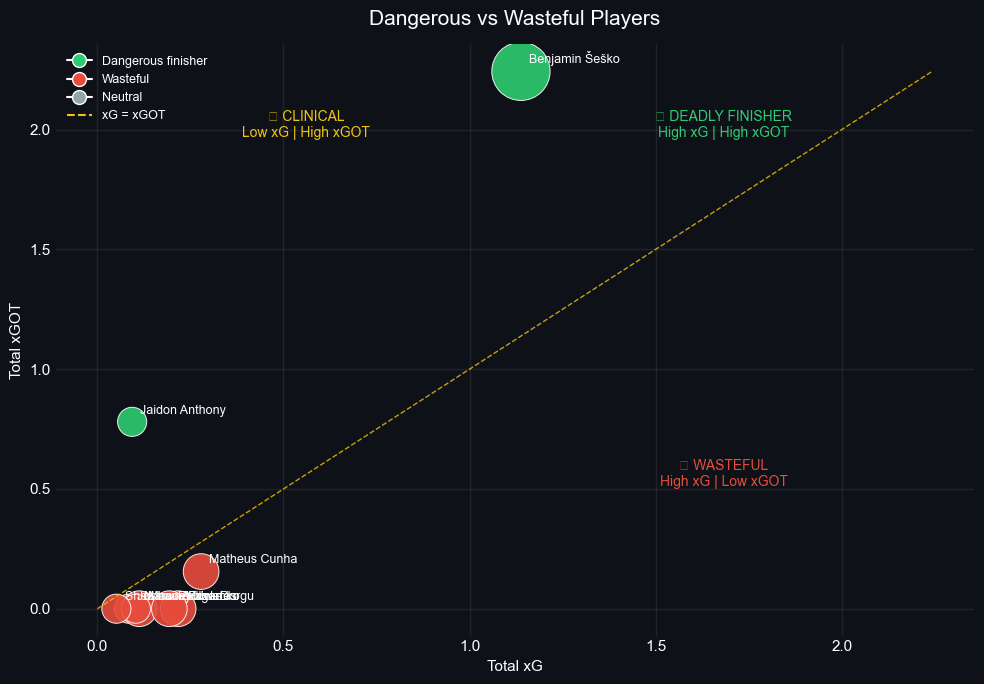

In [117]:
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")

# ===============================
# Base color logic
# ===============================
colors = np.where(
    player_stats["xgot_ratio"] > 1.2, "#2ecc71",
    np.where(player_stats["xgot_ratio"] < 0.6, "#e74c3c", "#95a5a6")
)

# ===============================
# Override: (goal scorer)
# ===============================
is_krejci = player_stats["player.name"] == "Benjamin Sesko"
colors[is_krejci] = "#f1c40f"  # gold

# ===============================
# Scatter
# ===============================
ax.scatter(
    player_stats["total_xg"],
    player_stats["total_xgot"],
    s=player_stats["shots"] * 220,
    c=colors,
    alpha=0.9,
    edgecolor="white",
    linewidth=np.where(is_krejci, 1.8, 0.7)  # highlight Krejčí
)

# ===============================
# Reference line
# ===============================
max_val = max(
    player_stats["total_xg"].max(),
    player_stats["total_xgot"].max()
)

ax.plot(
    [0, max_val],
    [0, max_val],
    linestyle="--",
    color="#f1c40f",
    linewidth=1,
    alpha=0.8
)

# ===============================
# Annotations (extremes + Krejčí)
# ===============================
for _, row in player_stats.iterrows():
    if (
        row["xgot_ratio"] < 0.6
        or row["xgot_ratio"] > 1.2
        or row["player.name"] == "Ladislav Krejčí"
    ):
        ax.annotate(
            row["player.name"],
            (row["total_xg"], row["total_xgot"]),
            xytext=(6, 6),
            textcoords="offset points",
            fontsize=9,
            color="white"
        )

# ===============================
# Quadrant Labels
# ===============================
ax.text(
    max_val * 0.75, max_val * 0.9,
    "🔥 DEADLY FINISHER\nHigh xG | High xGOT",
    fontsize=10, color="#2ecc71", ha="center", va="center"
)

ax.text(
    max_val * 0.75, max_val * 0.25,
    "❌ WASTEFUL\nHigh xG | Low xGOT",
    fontsize=10, color="#e74c3c", ha="center", va="center"
)

ax.text(
    max_val * 0.25, max_val * 0.9,
    "🎯 CLINICAL\nLow xG | High xGOT",
    fontsize=10, color="#f1c40f", ha="center", va="center"
)

# ===============================
# Legend (manual, clean)
# ===============================
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Dangerous finisher',
           markerfacecolor='#2ecc71', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Wasteful',
           markerfacecolor='#e74c3c', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Neutral',
           markerfacecolor='#95a5a6', markersize=10),
    Line2D([0], [0], linestyle='--', color='#f1c40f', label='xG = xGOT')
]

ax.legend(
    handles=legend_elements,
    loc="upper left",
    frameon=False,
    fontsize=9
)

# ===============================
# Labels & title
# ===============================
ax.set_xlabel("Total xG", fontsize=11, color="white")
ax.set_ylabel("Total xGOT", fontsize=11, color="white")

ax.set_title(
    "Dangerous vs Wasteful Players",
    fontsize=15,
    color="white",
    pad=14
)

# ===============================
# Grid & spines
# ===============================
ax.grid(color="white", alpha=0.08)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#666666")
ax.spines["bottom"].set_color("#666666")

plt.tight_layout()
plt.show()


In [16]:
# Top 6 based on xGOT
top6_xgot = (
    player_stats
    .sort_values("total_xgot", ascending=False)
    .head(6)
    .reset_index(drop=True)
)

top6_xgot.style.hide(axis="index")


player.name,shots,total_xg,total_xgot,xgot_ratio
Benjamin Šeško,8,1.138065,2.243331,1.971181
Jaidon Anthony,2,0.093314,0.780101,8.359941
Matheus Cunha,3,0.278632,0.155140,0.556793
Joshua Zirkzee,2,0.084860,0.000000,0.000000
Casemiro,3,0.216912,0.000000,0.000000
Manuel Ugarte,3,0.112430,0.000000,0.000000


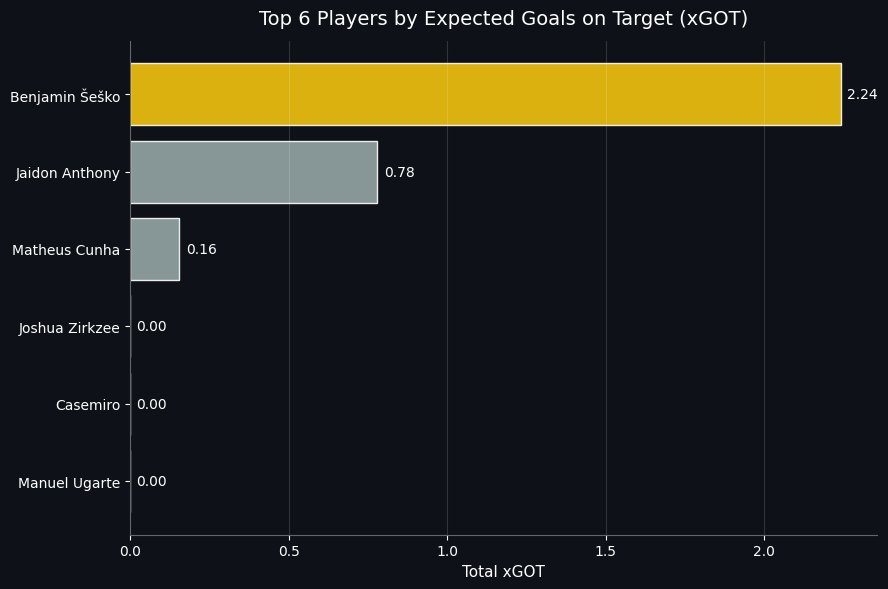

In [17]:
plt.style.use("dark_background")

# Ambil Top 6 xGOT
top6_xgot = (
    player_stats
    .sort_values("total_xgot", ascending=False)
    .head(6)
    .reset_index(drop=True)
)

fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")
colors = ["#f1c40f"] + ["#95a5a6"] * (len(top6_xgot) - 1)

# Bar chart
bars = ax.barh(
    top6_xgot["player.name"],
    top6_xgot["total_xgot"],
    color=colors,
    edgecolor="white",
    alpha=0.9
)

# Value labels
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 0.02,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va="center",
        fontsize=10,
        color="white"
    )

# Invert y-axis (ranking)
ax.invert_yaxis()

# Labels & title
ax.set_xlabel("Total xGOT", fontsize=11)
ax.set_ylabel("")
ax.set_title(
    "Top 6 Players by Expected Goals on Target (xGOT)",
    fontsize=14,
    pad=12
)

# Grid & spines
ax.grid(axis="x", alpha=0.15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#666666")
ax.spines["bottom"].set_color("#666666")

plt.tight_layout()
plt.show()


### Shot Map

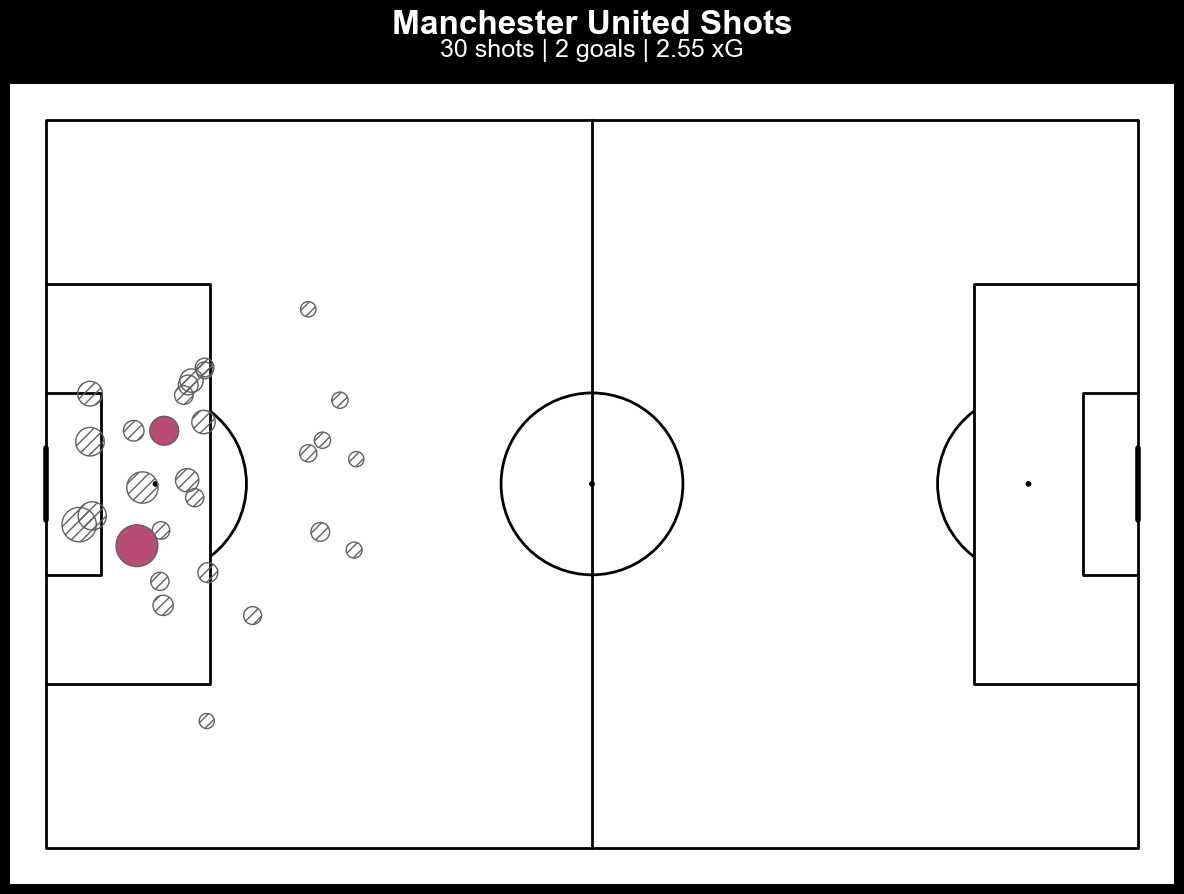

In [130]:
raw_data = json.loads(raw)

# Convert to DataFrame
df_shots = pd.json_normalize(raw_data['shotmap'])

# Filter hanya tim away (Man Utd) dan buat salinan baru
df_away = df_shots[df_shots['isHome'] == False].copy()

# Convert coordinates
df_away['x'] = df_away['playerCoordinates.x'] * 1.2
df_away['y'] = df_away['playerCoordinates.y'] * 0.8

# Separate goals and non-goals
df_away_goals = df_away[df_away['shotType'] == 'goal']
df_away_non_goals = df_away[df_away['shotType'] != 'goal']

# Create pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Create figure dengan ruang untuk title
fig, ax = pitch.draw(figsize=(12, 10))
fig.subplots_adjust(top=0.85)  # Beri ruang untuk title

# Plot shots
if not df_away_non_goals.empty:
    pitch.scatter(df_away_non_goals.x, df_away_non_goals.y,
                  s=(df_away_non_goals.xg * 1900) + 100,
                  edgecolors='#606060',
                  c='None',
                  hatch='///',
                  marker='o',
                  ax=ax)

if not df_away_goals.empty:
    pitch.scatter(df_away_goals.x, df_away_goals.y,
                  s=(df_away_goals.xg * 1900) + 100,
                  edgecolors='#606060',
                  c='#b94b75',
                  marker='o',
                  ax=ax)

# Add title di atas pitch
total_shots = len(df_away)
total_goals = len(df_away_goals)
total_xg = df_away.xg.sum()

plt.suptitle("Manchester United Shots", 
             fontsize=24, fontweight='bold', y=0.95)
plt.title(f"{total_shots} shots | {total_goals} goals | {total_xg:.2f} xG", 
          fontsize=18, pad=20)

plt.tight_layout()
plt.show()

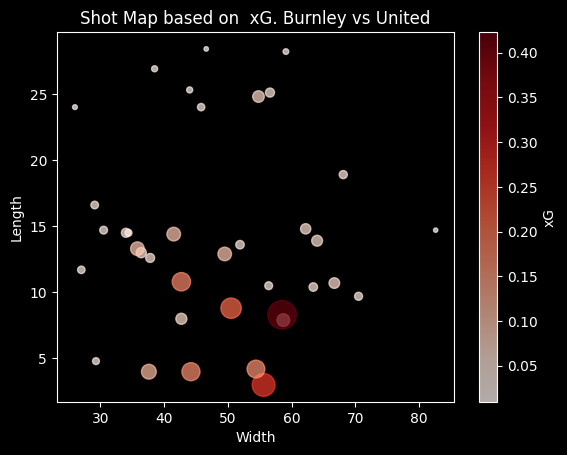

In [18]:
plt.scatter(
    df["playerCoordinates.y"],
    df["playerCoordinates.x"],
    c=df["xg"],
    cmap="Reds",
    s=df["xg"]*1000,
    alpha=0.7
)
plt.colorbar(label="xG")
plt.xlabel("Width")
plt.ylabel("Length")
plt.title("Shot Map based on  xG. Burnley vs United")
plt.show()


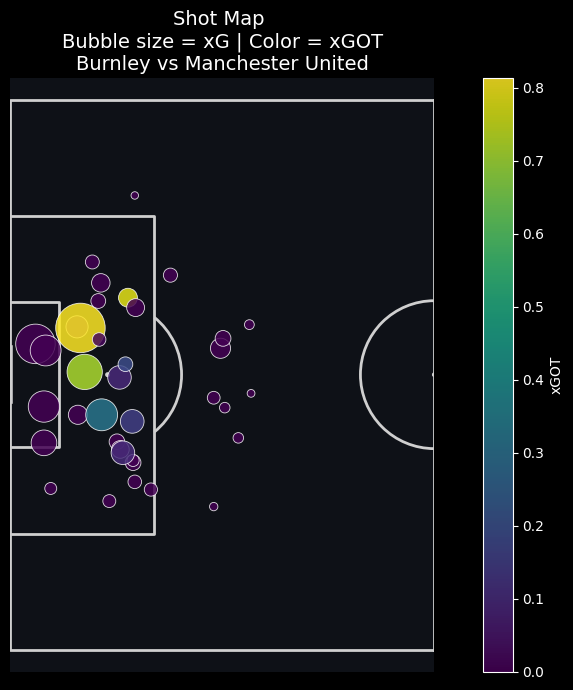

In [19]:
pitch = Pitch(
    pitch_type="opta",
    pitch_color="#0e1117",
    line_color="#cfcfcf"
)

fig, ax = pitch.draw(figsize=(10, 7))

# Batasi ke setengah lapangan kiri
ax.set_xlim(0, 50)

sc = pitch.scatter(
    df["playerCoordinates.x"],
    df["playerCoordinates.y"],
    s=df["xg"] * 3000,
    c=df["xgot"],
    cmap="viridis",
    edgecolors="white",
    linewidth=0.6,
    alpha=0.85,
    ax=ax
)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("xGOT")

ax.set_title(
    "Shot Map \nBubble size = xG | Color = xGOT\nBurnley vs Manchester United",
    color="white",
    fontsize=14
)

plt.show()


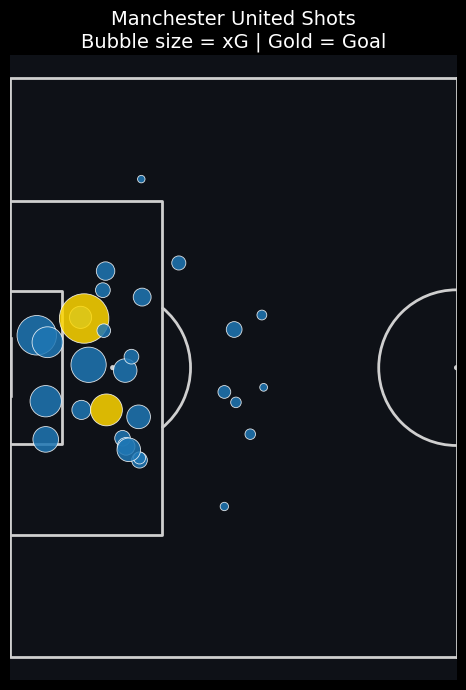

In [20]:
# Filter shots Manchester United (away)
df_manutd = df[df['isHome'] == False]

# Buat pitch
pitch = Pitch(
    pitch_type="opta",
    pitch_color="#0e1117",  # background gelap
    line_color="#cfcfcf"
)

fig, ax = pitch.draw(figsize=(10, 7))

# Batasi ke setengah lapangan kiri (arah goal Leeds)
ax.set_xlim(0, 50)

# Tandai gol dengan warna emas
colors = df_manutd['shotType'].apply(lambda x: 'gold' if x == 'goal' else '#1f77b4')  # biru untuk non-goal

sc = pitch.scatter(
    df_manutd["playerCoordinates.x"],
    df_manutd["playerCoordinates.y"],
    s=df_manutd["xg"] * 3000,
    c=colors,
    edgecolors="white",
    linewidth=0.6,
    alpha=0.85,
    ax=ax
)

ax.set_title(
    "Manchester United Shots\nBubble size = xG | Gold = Goal",
    color="white",
    fontsize=14
)

plt.show()


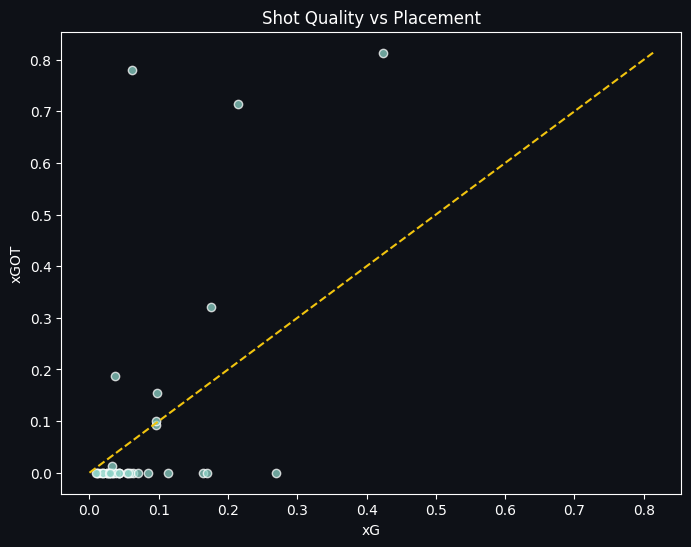

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")

ax.scatter(
    df["xg"],
    df["xgot"],
    alpha=0.75,
    edgecolor="white"
)

max_val = max(df["xg"].max(), df["xgot"].max())
ax.plot([0, max_val], [0, max_val], "--", color="#f1c40f")

ax.set_xlabel("xG")
ax.set_ylabel("xGOT")
ax.set_title("Shot Quality vs Placement", color="white")

plt.show()


### Open Play vs Set-piece Chances

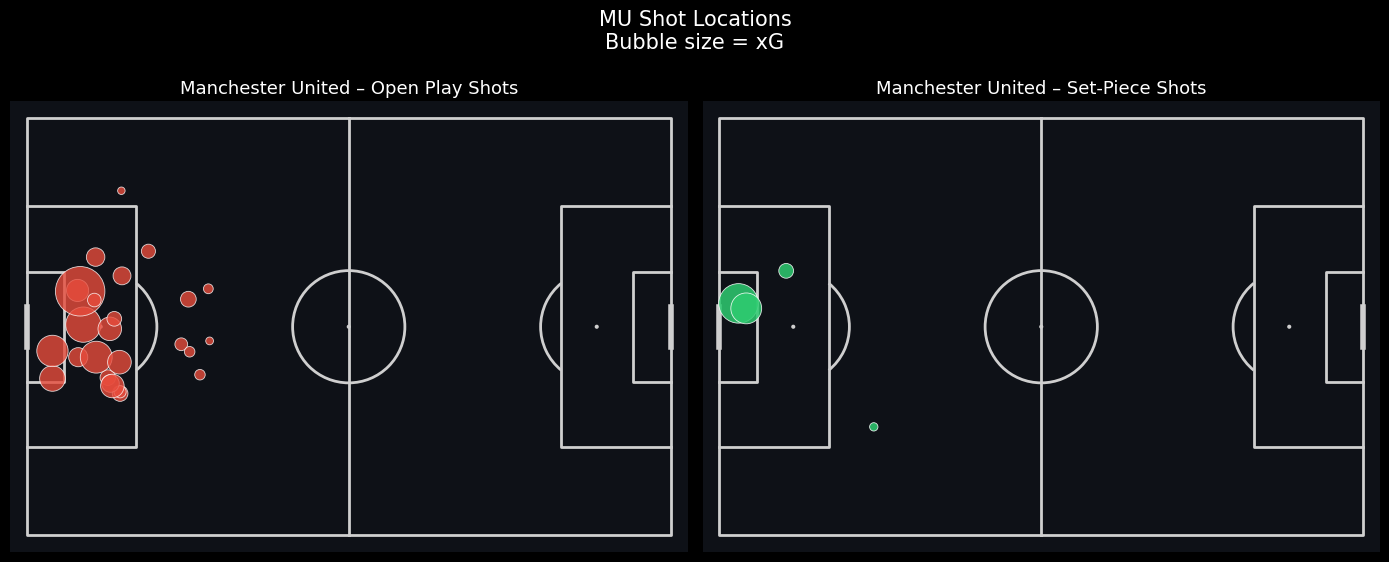

In [23]:
# Filter MU shots
mu = df[df["isHome"] == False]

open_play = mu[~mu["situation"].isin(["corner", "free_kick"])]
set_piece = mu[mu["situation"].isin(["corner", "free_kick"])]

pitch = Pitch(
    pitch_type="opta",
    pitch_color="#0e1117",
    line_color="#cfcfcf"
)

fig, axs = pitch.draw(ncols=2, figsize=(14, 6))

# OPEN PLAY
pitch.scatter(
    open_play["playerCoordinates.x"],
    open_play["playerCoordinates.y"],
    s=open_play["xg"] * 3000,
    color="#e74c3c",
    alpha=0.8,
    edgecolors="white",
    linewidth=0.6,
    ax=axs[0]
)
axs[0].set_title("Manchester United – Open Play Shots",
                 fontsize=13, color="white")

# SET PIECE
pitch.scatter(
    set_piece["playerCoordinates.x"],
    set_piece["playerCoordinates.y"],
    s=set_piece["xg"] * 3000,
    color="#2ecc71",
    alpha=0.85,
    edgecolors="white",
    linewidth=0.6,
    ax=axs[1]
)
axs[1].set_title("Manchester United – Set-Piece Shots",
                 fontsize=13, color="white")

plt.suptitle(
    "MU Shot Locations\nBubble size = xG",
    fontsize=15,
    color="white"
)
plt.show()


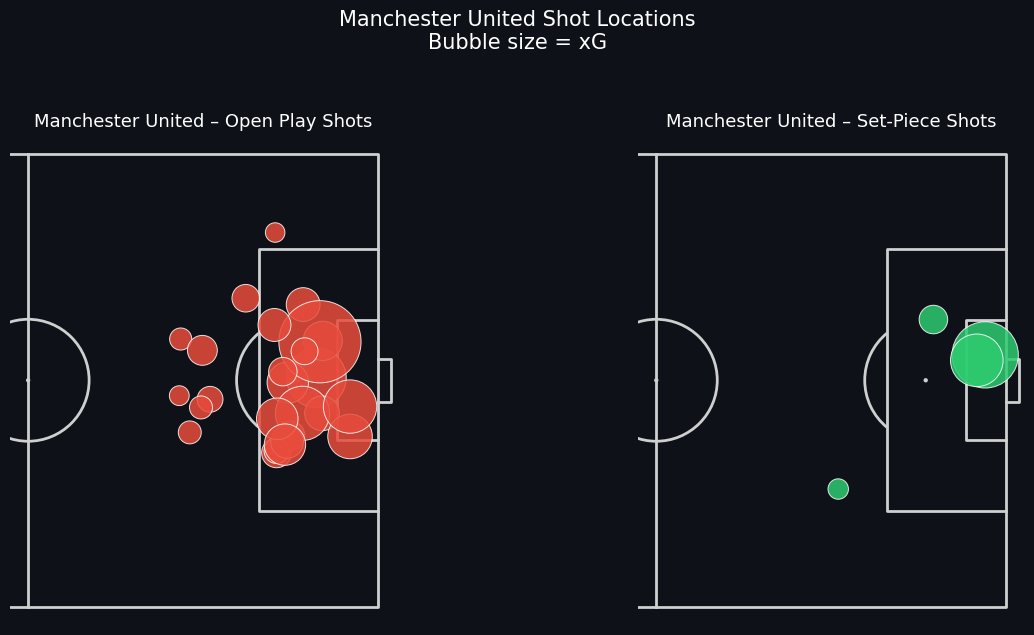

In [24]:
mu = df[df["isHome"] == False].copy()

# Flip x so all shots are in attacking half (IMPORTANT)
mu["x"] = np.where(
    mu["playerCoordinates.x"] < 50,
    100 - mu["playerCoordinates.x"],
    mu["playerCoordinates.x"]
)
mu["y"] = mu["playerCoordinates.y"]

open_play = mu[~mu["situation"].isin(["corner", "free_kick"])]
set_piece = mu[mu["situation"].isin(["corner", "free_kick"])]

# ===============================
# Bubble sizes (FORCED VISIBLE)
# ===============================
open_sizes = open_play["xg"] * 8000 + 120
set_sizes  = set_piece["xg"] * 8000 + 120

# ===============================
# Half pitch
# ===============================
pitch = Pitch(
    pitch_type="opta",
    half=True,
    goal_type="box",
    pitch_color="#0e1117",
    line_color="#cfcfcf"
)

fig, axs = pitch.draw(ncols=2, figsize=(14, 6))
fig.patch.set_facecolor("#0e1117")

# ===============================
# OPEN PLAY
# ===============================
pitch.scatter(
    open_play["x"],
    open_play["y"],
    s=open_sizes,
    color="#e74c3c",
    alpha=0.85,
    edgecolors="white",
    linewidth=0.7,
    zorder=3,
    ax=axs[0]
)

axs[0].set_title(
    "Manchester United – Open Play Shots",
    fontsize=13,
    color="white"
)

# ===============================
# SET PIECE
# ===============================
pitch.scatter(
    set_piece["x"],
    set_piece["y"],
    s=set_sizes,
    color="#2ecc71",
    alpha=0.85,
    edgecolors="white",
    linewidth=0.7,
    zorder=3,
    ax=axs[1]
)

axs[1].set_title(
    "Manchester United – Set-Piece Shots",
    fontsize=13,
    color="white"
)

# ===============================
# Title
# ===============================
plt.suptitle(
    "Manchester United Shot Locations\nBubble size = xG",
    fontsize=15,
    color="white",
    y=1.05
)

plt.tight_layout()
plt.show()


In [25]:
mu = df[df["isHome"] == False]

# Kategori situasi
mu["phase"] = mu["situation"].apply(
    lambda x: "Set Piece" if x in ["corner", "free_kick"] else "Open Play"
)

# Agregasi statistik
summary = (
    mu.groupby("phase")
    .agg(
        shots=("xg", "count"),
        total_xg=("xg", "sum"),
        avg_xg_per_shot=("xg", "mean"),
        total_xgot=("xgot", "sum"),
        avg_xgot_per_shot=("xgot", "mean"),
    )
    .reset_index()
)

# Tambah efisiensi finishing
summary["xgot_per_xg"] = summary["total_xgot"] / summary["total_xg"]

summary


/var/folders/h0/lcjxkqs93vg7qg_3nsfsq85m0000gn/T/ipykernel_2138/1381415280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mu["phase"] = mu["situation"].apply(


,phase,shots,total_xg,avg_xg_per_shot,total_xgot,avg_xgot_per_shot,xgot_per_xg
0,Open Play,26,2.06261,0.079331,2.398471,0.092249,1.162833
1,Set Piece,4,0.48395,0.120988,0.000000,0.000000,0.000000


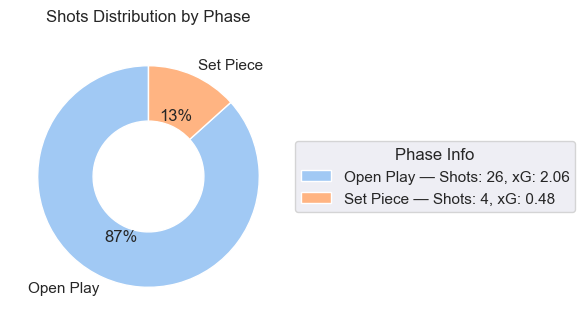

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data summary sesuai yang kamu punya
summary = pd.DataFrame({
    "phase": ["Open Play", "Set Piece"],
    "shots": [26, 4],
    "total_xg": [2.06261, 0.48395]
})

# Value yang dipakai untuk pie (shots)
data = summary["shots"]
labels = summary["phase"]

# Warna seaborn pastel
colors = sns.color_palette("pastel")

# Format label untuk legend (mengandung info shots & xG)
legend_labels = [
    f"{row.phase} — Shots: {row.shots}, xG: {row.total_xg:.2f}"
    for row in summary.itertuples()
]

fig, ax = plt.subplots(figsize=(6, 6))

# Donut-style pie chart
wedges, texts, autotexts = ax.pie(
    data,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct="%.0f%%",
    wedgeprops=dict(width=0.5)   # buat jadi donut
)

# Legend di kanan
ax.legend(
    wedges,
    legend_labels,
    title="Phase Info",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

ax.set_title("Shots Distribution by Phase", pad=12)
plt.tight_layout()
plt.show()


In [30]:
mu = df[df["isHome"] == False].copy()

# Klasifikasi fase
mu["phase"] = mu["situation"].apply(
    lambda x: "Set Piece" if x in ["corner", "free_kick"] else "Open Play"
)

# Agregasi per pemain & fase
player_breakdown = (
    mu.groupby(["player.name", "phase"])
    .agg(
        shots=("xg", "count"),
        total_xg=("xg", "sum"),
        avg_xg=("xg", "mean"),
        total_xgot=("xgot", "sum"),
        avg_xgot=("xgot", "mean"),
    )
    .reset_index()
)

# Efisiensi finishing
player_breakdown["xgot_per_xg"] = (
    player_breakdown["total_xgot"] / player_breakdown["total_xg"]
)

# Rapikan tampilan
player_breakdown = player_breakdown.sort_values(
    ["total_xg"], ascending=False
)

player_breakdown.style.hide(axis="index")


player.name,phase,shots,total_xg,avg_xg,total_xgot,avg_xgot,xgot_per_xg
Benjamin Šeško,Open Play,8,1.138065,0.142258,2.243331,0.280416,1.971181
Ayden Heaven,Set Piece,1,0.269772,0.269772,0.000000,0.000000,0.000000
Matheus Cunha,Open Play,2,0.266540,0.133270,0.155140,0.077570,0.582051
Patrick Dorgu,Open Play,3,0.193330,0.064443,0.000000,0.000000,0.000000
Casemiro,Set Piece,1,0.164291,0.164291,0.000000,0.000000,0.000000
Joshua Zirkzee,Open Play,2,0.084860,0.042430,0.000000,0.000000,0.000000
Leny Yoro,Open Play,1,0.084611,0.084611,0.000000,0.000000,0.000000
Manuel Ugarte,Open Play,2,0.074634,0.037317,0.000000,0.000000,0.000000
Bruno Fernandes,Open Play,1,0.059070,0.059070,0.000000,0.000000,0.000000
Casemiro,Open Play,2,0.052621,0.026311,0.000000,0.000000,0.000000


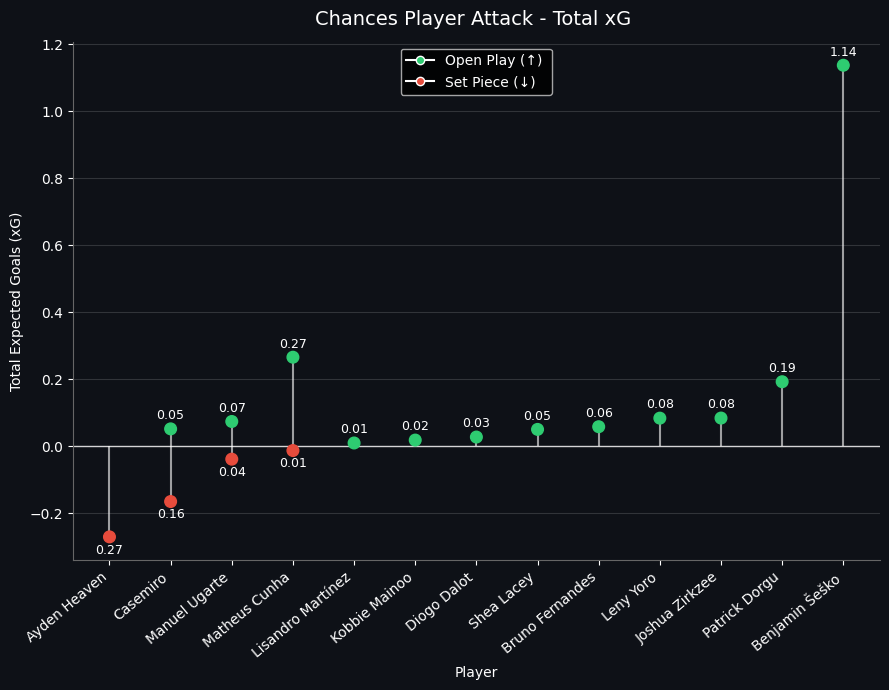

In [71]:
df_plot = player_breakdown.copy()

# Gunakan nilai positif utk Open Play & negatif utk Set Piece
df_plot["value"] = df_plot.apply(
    lambda row: row["total_xg"] if row["phase"] == "Open Play" else -row["total_xg"],
    axis=1
)

# Sorting biar rapi
df_plot = df_plot.sort_values("value")

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(9, 7))
fig.patch.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")

# Warna berdasarkan phase
colors = df_plot["phase"].map({"Open Play": "#2ecc71", "Set Piece": "#e74c3c"})

# Lollipop stick
ax.vlines(
    x=df_plot["player.name"],
    ymin=0,
    ymax=df_plot["value"],
    color="white",
    alpha=0.6,
    linewidth=1.5
)

# Lollipop head
ax.scatter(
    df_plot["player.name"],
    df_plot["value"],
    s=70,
    zorder=3,
    color=colors
)

# === Tambahkan value di ujung bola ===
for idx, row in df_plot.iterrows():
    y = row["value"]
    label = f"{abs(y):.2f}"
    ax.text(
        row["player.name"],
        y + (0.02 if y > 0 else -0.02),  # offset sedikit ke atas / bawah
        label,
        ha="center",
        va="bottom" if y > 0 else "top",
        fontsize=9,
        color="white"
    )

# Title & axis labels
ax.set_title(
    "Chances Player Attack - Total xG ",
    fontsize=14,
    pad=12
)
ax.set_ylabel("Total Expected Goals (xG)")
ax.set_xlabel("Player")

# Garis tengah
ax.axhline(0, color="white", linewidth=1, alpha=0.8)

# Legend manual
handles = [
    plt.Line2D([0], [0], marker='o', color="white", label='Open Play (↑) ', markerfacecolor='#2ecc71'),
    plt.Line2D([0], [0], marker='o', color="white", label='Set Piece (↓)', markerfacecolor='#e74c3c')
]
ax.legend(handles=handles, loc="upper center")

# Styling
ax.grid(axis="y", alpha=0.15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#666666")
ax.spines["bottom"].set_color("#666666")

plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()


### Tactical Data

In [31]:
mu = df[df["isHome"] == False].copy()

mu["phase"] = np.where(
    mu["situation"].isin(["corner", "free_kick"]),
    "Set Piece",
    "Open Play"
)

In [32]:
mu["phase"].value_counts()

phase
Open Play    26
Set Piece     4
Name: count, dtype: int64

In [33]:
def shot_zone(row):
    x, y = row["playerCoordinates.x"], row["playerCoordinates.y"]

    # Central box (cutback zone)
    if x >= 83 and 36 <= y <= 64:
        return "Central / Cutback Zone"

    # Wide box
    if x >= 83 and (y < 36 or y > 64):
        return "Wide Box"

    # Outside box
    if x < 83:
        return "Outside Box"

    return "Other"

mu["zone"] = mu.apply(shot_zone, axis=1)

In [34]:
def shot_zone(row):
    x = row["playerCoordinates.x"]
    y = row["playerCoordinates.y"]

    if x >= 83 and 36 <= y <= 64:
        return "Central / Cutback Zone"
    elif x >= 83:
        return "Wide Box"
    else:
        return "Outside Box"

mu["zone"] = mu.apply(shot_zone, axis=1)
mu["zone"].value_counts()

zone
Outside Box    30
Name: count, dtype: int64

In [36]:
players = ["Benjamin Šeško", "Patrick Dorgu", "Matheus Cunha"]

finish_breakdown = (
    mu[mu["player.name"].isin(players)]
    .groupby(["player.name", "bodyPart"])
    .agg(
        shots=("xg", "count"),
        total_xg=("xg", "sum"),
        total_xgot=("xgot", "sum"),
        avg_xg=("xg", "mean")
    )
    .reset_index()
)

In [39]:
sesko_finish = finish_breakdown[
    finish_breakdown["player.name"] == "Benjamin Šeško"
]
sesko_finish.style.hide(axis="index")


player.name,bodyPart,shots,total_xg,total_xgot,avg_xg
Benjamin Šeško,head,3,0.132564,0.200981,0.044188
Benjamin Šeško,left-foot,1,0.214954,0.714153,0.214954
Benjamin Šeško,right-foot,4,0.790547,1.328197,0.197637


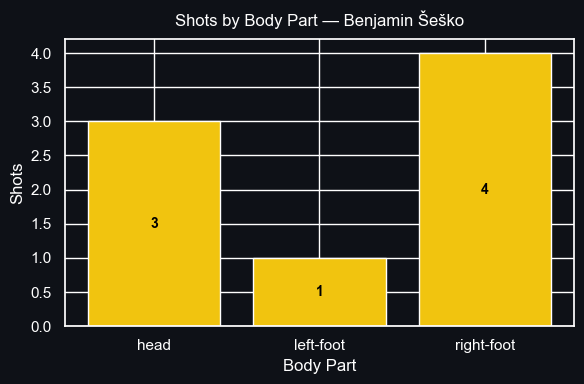

In [76]:
import matplotlib.pyplot as plt

df = sesko_finish.copy()

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(6,4))
fig.patch.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")

bars = ax.bar(df["bodyPart"], df["shots"], color="#f1c40f", edgecolor="white")

# Taruh label di tengah bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # pusat secara horizontal
        height / 2,                          # pusat secara vertical
        f"{int(height)}",
        ha="center",
        va="center",
        color="black",                       # agar kontras dengan warna emas
        fontsize=10,
        fontweight="bold"
    )

ax.set_title("Shots by Body Part — Benjamin Šeško", pad=10)
ax.set_ylabel("Shots")
ax.set_xlabel("Body Part")

plt.tight_layout()
plt.show()


In [40]:
dorgu_finish = finish_breakdown[
    finish_breakdown["player.name"] == "Patrick Dorgu"
]
dorgu_finish.style.hide(axis="index")

player.name,bodyPart,shots,total_xg,total_xgot,avg_xg
Patrick Dorgu,left-foot,2,0.167750,0.000000,0.083875
Patrick Dorgu,right-foot,1,0.025580,0.000000,0.025580


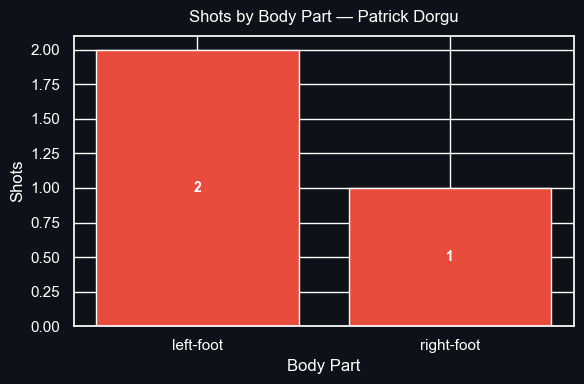

In [77]:
import matplotlib.pyplot as plt

df = dorgu_finish.copy()

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(6,4))
fig.patch.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")

# Warna merah
bars = ax.bar(df["bodyPart"], df["shots"], color="#e74c3c", edgecolor="white")

# Label di tengah bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f"{int(height)}",
        ha="center",
        va="center",
        color="white",
        fontsize=10,
        fontweight="bold"
    )

ax.set_title("Shots by Body Part — Patrick Dorgu", pad=10)
ax.set_ylabel("Shots")
ax.set_xlabel("Body Part")

plt.tight_layout()
plt.show()


In [41]:
cunha_finish = finish_breakdown[
    finish_breakdown["player.name"] == "Matheus Cunha"
]
cunha_finish.style.hide(axis="index")

player.name,bodyPart,shots,total_xg,total_xgot,avg_xg
Matheus Cunha,head,1,0.169657,0.000000,0.169657
Matheus Cunha,left-foot,1,0.096883,0.155140,0.096883
Matheus Cunha,right-foot,1,0.012091,0.000000,0.012091


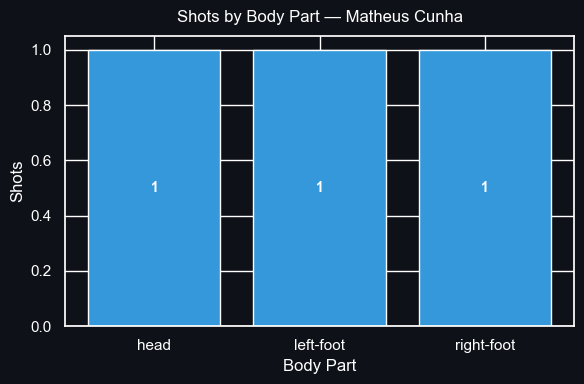

In [78]:
import matplotlib.pyplot as plt

df = cunha_finish.copy()

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(6,4))
fig.patch.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")

# Warna biru
bars = ax.bar(df["bodyPart"], df["shots"], color="#3498db", edgecolor="white")

# Label di tengah bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f"{int(height)}",
        ha="center",
        va="center",
        color="white",
        fontsize=10,
        fontweight="bold"
    )

ax.set_title("Shots by Body Part — Matheus Cunha", pad=10)
ax.set_ylabel("Shots")
ax.set_xlabel("Body Part")

plt.tight_layout()
plt.show()


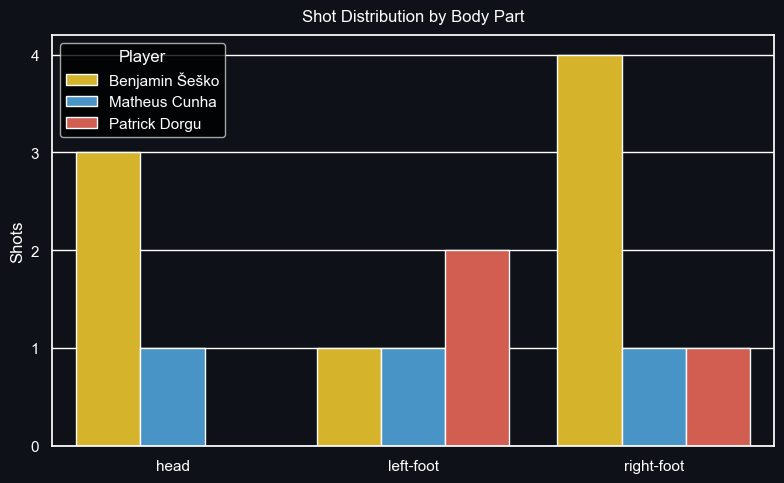

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(8,5))
fig.patch.set_facecolor("#0e1117")
ax.set_facecolor("#0e1117")

palette = {
    "Benjamin Šeško": "#f1c40f",  # gold
    "Patrick Dorgu": "#e74c3c",   # red
    "Matheus Cunha": "#3498db"    # blue
}

sns.barplot(
    data=finish_breakdown,
    x="bodyPart",
    y="shots",
    hue="player.name",
    palette=palette,
    edgecolor="white",
    ax=ax
)

# --- atur agar y-ticks integer ---
max_val = finish_breakdown["shots"].max()
ax.set_yticks(np.arange(0, max_val + 1, 1))

# titles
ax.set_title("Shot Distribution by Body Part", pad=10)
ax.set_xlabel("")
ax.set_ylabel("Shots")
ax.legend(title="Player")

plt.tight_layout()
plt.show()


In [44]:
cutback_ratio = (
    mu[mu["zone"] == "Central / Cutback Zone"]["xg"].sum()
    / mu["xg"].sum()
)

cutback_ratio

np.float64(0.0)

In [45]:
summary = {
    "Total Shots": mu.shape[0],
    "Total xG": mu["xg"].sum(),
    "Open Play xG": mu[mu["phase"] == "Open Play"]["xg"].sum(),
    "Set Piece xG": mu[mu["phase"] == "Set Piece"]["xg"].sum(),
    "Cutback Zone xG": mu[mu["zone"] == "Central / Cutback Zone"]["xg"].sum()
}

pd.DataFrame(summary, index=["Manchester United"])

,Total Shots,Total xG,Open Play xG,Set Piece xG,Cutback Zone xG
Manchester United,30,2.546561,2.06261,0.48395,0.0


## Defend Analysis

### GK: Saves Stats

In [46]:
raw_data = json.loads(raw)
shots = raw_data["shotmap"]
df = pd.json_normalize(shots)

df_shots = df[[
    "player.name",
    "isHome",
    "shotType",
    "situation",
    "bodyPart",
    "xg",
    "xgot",
    "goalkeeper.name",
    "playerCoordinates.x",
    "playerCoordinates.y",
    "goalMouthLocation"
]]

df_shots.rename(columns={
    "player.name": "player",
    "goalkeeper.name": "goalkeeper",
    "playerCoordinates.x": "x",
    "playerCoordinates.y": "y"
}, inplace=True)

df_shots.head()

/var/folders/h0/lcjxkqs93vg7qg_3nsfsq85m0000gn/T/ipykernel_2138/2141685851.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shots.rename(columns={


,player,isHome,shotType,situation,bodyPart,xg,xgot,goalkeeper,x,y,goalMouthLocation
0,Shea Lacey,False,miss,assisted,left-foot,0.016665,0.0,Martin Dúbravka,28.2,59.1,close-high-right
1,Kobbie Mainoo,False,miss,regular,right-foot,0.019170,0.0,Martin Dúbravka,26.9,38.5,high
2,Diogo Dalot,False,block,assisted,right-foot,0.028218,0.0,Martin Dúbravka,24.0,45.8,low-centre
3,Joshua Zirkzee,False,miss,assisted,left-foot,0.042847,0.0,Martin Dúbravka,14.5,34.0,close-right
4,Shea Lacey,False,post,assisted,left-foot,0.034366,0.0,Martin Dúbravka,18.9,68.1,high


In [51]:
# Set up
data = {
    "isHome": [False, True],
    "shots": [15, 10],
    "goals": [1, 1],
    "total_xg": [1.457055, 0.921039],
    "total_xgot": [0.575195, 1.344608],
    "shots_on_target": [2, 3]
}

df_summary = pd.DataFrame(data)

# Tambahkan nama kiper berdasarkan isHome
df_summary["goalkeeper"] = df_summary["isHome"].map({True: "Lucas Perri", False: "Senne Lammens"})

# Tambahkan kolom xGOT minus goals
df_summary["xgot_minus_goals"] = df_summary["total_xgot"] - df_summary["goals"]

# Tampilkan DataFrame akhir
df_summary = df_summary[["goalkeeper", "shots", "goals", "total_xg", "total_xgot", "shots_on_target", "xgot_minus_goals"]]
df_summary.style.hide(axis="index")


goalkeeper,shots,goals,total_xg,total_xgot,shots_on_target,xgot_minus_goals
Senne Lammens,15,1,1.457055,0.575195,2,-0.424805
Lucas Perri,10,1,0.921039,1.344608,3,0.344608


## Defender

In [52]:
zone_defender_df = pd.DataFrame({
    "Zone": [
        "Left CB Zone",
        "Central Zone",
        "Right CB Zone"
    ],
    "Area Description": [
        "Left half-space inside penalty box",
        "Central box (6-yard box & penalty spot)",
        "Right half-space inside penalty box"
    ],
    "Primary Defender": [
        "Lisandro Martínez",
        "Leny Yoro",
        "Ayden Heaven"
    ]
})

zone_defender_df

,Zone,Area Description,Primary Defender
0,Left CB Zone,Left half-space inside penalty box,Lisandro Martínez
1,Central Zone,Central box (6-yard box & penalty spot),Leny Yoro
2,Right CB Zone,Right half-space inside penalty box,Ayden Heaven


In [53]:
defensive_metrics = pd.DataFrame({
    "metric": [
        "shots_conceded",
        "goals_conceded",
        "total_xg",
        "avg_xg",
        "fast_break_shots",
        "set_piece_shots",
        "xgot_minus_goals"
    ],
    "definition": [
        "Total number of opponent shots conceded",
        "Total goals conceded from those shots",
        "Sum of expected goals conceded",
        "Average xG per shot conceded",
        "Shots conceded from transition situations",
        "Shots conceded from set-piece situations",
        "xGOT conceded minus actual goals conceded"
    ]
})

defensive_metrics


,metric,definition
0,shots_conceded,Total number of opponent shots conceded
1,goals_conceded,Total goals conceded from those shots
2,total_xg,Sum of expected goals conceded
3,avg_xg,Average xG per shot conceded
4,fast_break_shots,Shots conceded from transition situations
5,set_piece_shots,Shots conceded from set-piece situations
6,xgot_minus_goals,xGOT conceded minus actual goals conceded


In [54]:
df = pd.json_normalize(raw_data["shotmap"], sep="_")

# only shots conceded by Manchester United
conceded = df[df["isHome"] == False].copy()

# =========================
# ZONE DEFINITION
# =========================
def zone(row):
    x, y = row["playerCoordinates_x"], row["playerCoordinates_y"]
    if x <= 14 and 36 <= y <= 64:
        return "Central Zone"
    elif y < 36:
        return "Left CB Zone"
    elif y > 64:
        return "Right CB Zone"
    return "Other"

conceded["zone"] = conceded.apply(zone, axis=1)

# =========================
# CLEAN & ORDER ZONES
# =========================
zone_order = [
    "Left CB Zone",
    "Central Zone",
    "Right CB Zone",
    "Other"
]

conceded["zone"] = conceded["zone"].astype(str).str.strip()
conceded["zone"] = pd.Categorical(
    conceded["zone"],
    categories=zone_order,
    ordered=True
)

# =========================
# GOAL FLAG
# =========================
conceded["is_goal"] = conceded["shotType"] == "goal"

# =========================
# AGGREGATION
# =========================
summary = conceded.groupby("zone", dropna=False).agg(
    shots_conceded=("shotType", "count"),
    goals_conceded=("is_goal", "sum"),
    total_xg=("xg", "sum"),
    avg_xg=("xg", "mean"),
    fast_break_shots=("situation", lambda x: (x == "fast-break").sum()),
    set_piece_shots=("situation", lambda x: x.isin([
        "corner", "free-kick", "throw-in-set-piece"
    ]).sum())
).reset_index()

# ensure correct order
summary = summary.sort_values("zone").reset_index(drop=True)

summary

/var/folders/h0/lcjxkqs93vg7qg_3nsfsq85m0000gn/T/ipykernel_2138/2354011136.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = conceded.groupby("zone", dropna=False).agg(


,zone,shots_conceded,goals_conceded,total_xg,avg_xg,fast_break_shots,set_piece_shots
0,Left CB Zone,4,0,0.176522,0.044130,1,1
1,Central Zone,15,2,1.977952,0.131863,0,3
2,Right CB Zone,3,0,0.103151,0.034384,0,0
3,Other,8,0,0.288936,0.036117,0,0


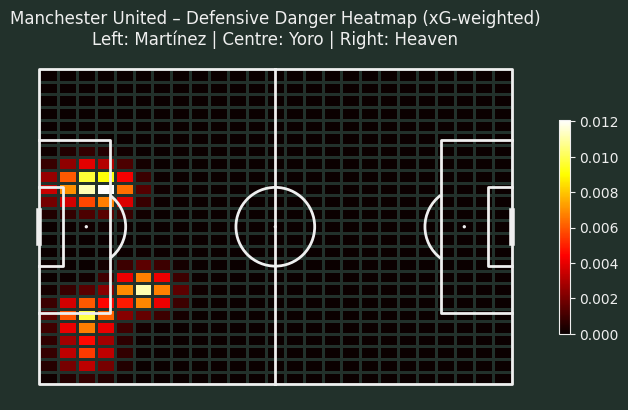

In [56]:
attack = df[df["isHome"] == True].copy()

attack = attack.dropna(subset=[
    "playerCoordinates_x",
    "playerCoordinates_y",
    "xg"
])

pitch = Pitch(
    pitch_type='statsbomb',
    line_zorder=2,
    pitch_color='#22312b',
    line_color='#efefef'
)

fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')

bin_statistic = pitch.bin_statistic(
    attack["playerCoordinates_x"],
    attack["playerCoordinates_y"],
    statistic='sum',
    values=attack["xg"],
    bins=(25, 25)
)

bin_statistic["statistic"] = gaussian_filter(
    bin_statistic["statistic"],
    sigma=1
)

pcm = pitch.heatmap(
    bin_statistic,
    ax=ax,
    cmap='hot',
    edgecolors='#22312b'
)

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(
    plt.getp(cbar.ax.axes, 'yticklabels'),
    color='#efefef'
)

ax.set_title(
    "Manchester United – Defensive Danger Heatmap (xG-weighted)\n"
    "Left: Martínez | Centre: Yoro | Right: Heaven",
    color='#efefef',
    fontsize=12
)


plt.show()


## Attacker

In [57]:
# Parsing JSON
data = json.loads(raw)
shots = data['shotmap']

# Fokus Man Utd sebagai away team
away_shots = [s for s in shots if s['isHome'] == False]

In [58]:
# Extract key information
effectiveness_list = []

for s in away_shots:
    situation = s['situation']      # shot situation
    xg = s['xg']                    # expected goals
    goal = 1 if s.get('goalType') else 0  # check if goal
    effectiveness_list.append({"Situation": situation, "xG": xg, "Goal": goal})

# Create DataFrame
df_effectiveness = pd.DataFrame(effectiveness_list)

# Summarize by situation
df_effectiveness_summary = df_effectiveness.groupby("Situation").agg(
    Shots_Count = ("xG", "count"),
    Total_xG = ("xG", "sum"),
    Goals = ("Goal", "sum")
).reset_index()

# Add conversion rate
df_effectiveness_summary["Conversion_Rate"] = (
    df_effectiveness_summary["Goals"] / df_effectiveness_summary["Shots_Count"] * 100
).round(2).astype(str) + "%"

print("=== Shot Effectiveness ===")
df_effectiveness_summary

=== Shot Effectiveness ===


,Situation,Shots_Count,Total_xG,Goals,Conversion_Rate
0,assisted,17,1.561840,2,11.76%
1,corner,4,0.483950,0,0.0%
2,fast-break,1,0.096003,0,0.0%
3,regular,7,0.235110,0,0.0%
4,set-piece,1,0.169657,0,0.0%


In [59]:
 # Define area based on y-coordinate (field length axis)
def categorize_area(y):
    if 40 <= y <= 60:
        return "Center of the Penalty Box"
    elif y < 40:
        return "Left Side of the Penalty Box"
    else:
        return "Right Side of the Penalty Box"

location_list = []

for s in away_shots:
    y = s['playerCoordinates']['y']
    area = categorize_area(y)
    goal = 1 if s.get('goalType') else 0
    xg = s['xg']
    location_list.append({"Area": area, "xG": xg, "Goal": goal})

df_location = pd.DataFrame(location_list)

# Summary
df_location_summary = df_location.groupby("Area").agg(
    Shots_Count = ("xG", "count"),
    Total_xG = ("xG", "sum"),
    Goals = ("Goal", "sum")
).reset_index()

print("\n=== Shot Location ===")
df_location_summary



=== Shot Location ===


,Area,Shots_Count,Total_xG,Goals
0,Center of the Penalty Box,17,1.944820,2
1,Left Side of the Penalty Box,8,0.405455,0
2,Right Side of the Penalty Box,5,0.196286,0


In [60]:
# Extract by situation
situation_list = []

for s in away_shots:
    situation = s['situation']
    goal = 1 if s.get('goalType') else 0
    xg = s['xg']
    situation_list.append({"Situation": situation, "xG": xg, "Goal": goal})

df_situation = pd.DataFrame(situation_list)

# Summary
df_situation_summary = df_situation.groupby("Situation").agg(
    Shots_Count = ("xG", "count"),
    Total_xG = ("xG", "sum"),
    Goals = ("Goal", "sum")
).reset_index()

print("\n=== Attack Situation ===")
df_situation_summary



=== Attack Situation ===


,Situation,Shots_Count,Total_xG,Goals
0,assisted,17,1.561840,2
1,corner,4,0.483950,0
2,fast-break,1,0.096003,0
3,regular,7,0.235110,0
4,set-piece,1,0.169657,0


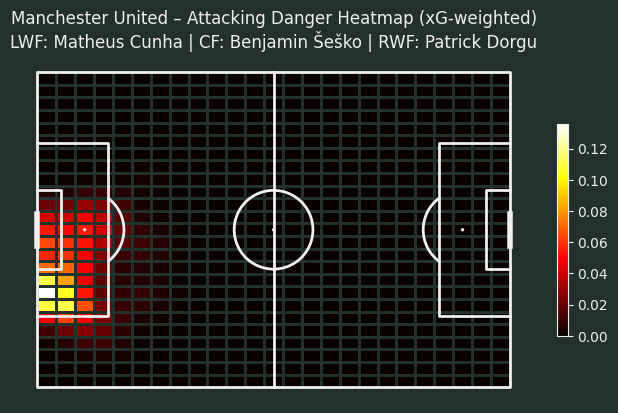

In [61]:
attack = df[df["isHome"] == False].copy()

attack = attack.dropna(subset=[
    "playerCoordinates_x",
    "playerCoordinates_y",
    "xg"
])

pitch = Pitch(
    pitch_type='statsbomb',
    line_zorder=2,
    pitch_color='#22312b',
    line_color='#efefef'
)

fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')

bin_statistic = pitch.bin_statistic(
    attack["playerCoordinates_x"],
    attack["playerCoordinates_y"],
    statistic='sum',
    values=attack["xg"],
    bins=(25, 25)
)

bin_statistic["statistic"] = gaussian_filter(
    bin_statistic["statistic"],
    sigma=1
)

pcm = pitch.heatmap(
    bin_statistic,
    ax=ax,
    cmap='hot',
    edgecolors='#22312b'
)

cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(
    plt.getp(cbar.ax.axes, 'yticklabels'),
    color='#efefef'
)

ax.set_title(
    "Manchester United – Attacking Danger Heatmap (xG-weighted)\n"
    "LWF: Matheus Cunha | CF: Benjamin Šeško | RWF: Patrick Dorgu",
    
    color='#efefef',
    fontsize=12
)

plt.show()


##### *@coded by: Dio Riza Pratama*

.

.

# Vibe Coding - DEEPSEEK

In [ ]:
from matplotlib.patches import FancyBboxPatch
import matplotlib.patheffects as path_effects

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Data summary sesuai yang kamu punya
summary = pd.DataFrame({
    "phase": ["Open Play", "Set Piece"],
    "shots": [26, 4],
    "total_xg": [2.06261, 0.48395

Data Summary:
       phase  shots  total_xg  percentage  xg_per_shot
0  Open Play     26   2.06261        86.7        0.079
1  Set Piece      4   0.48395        13.3        0.121


VISUALISASI 1: Enhanced Donut Chart
VISUALISASI 2: Bar Chart Comparison


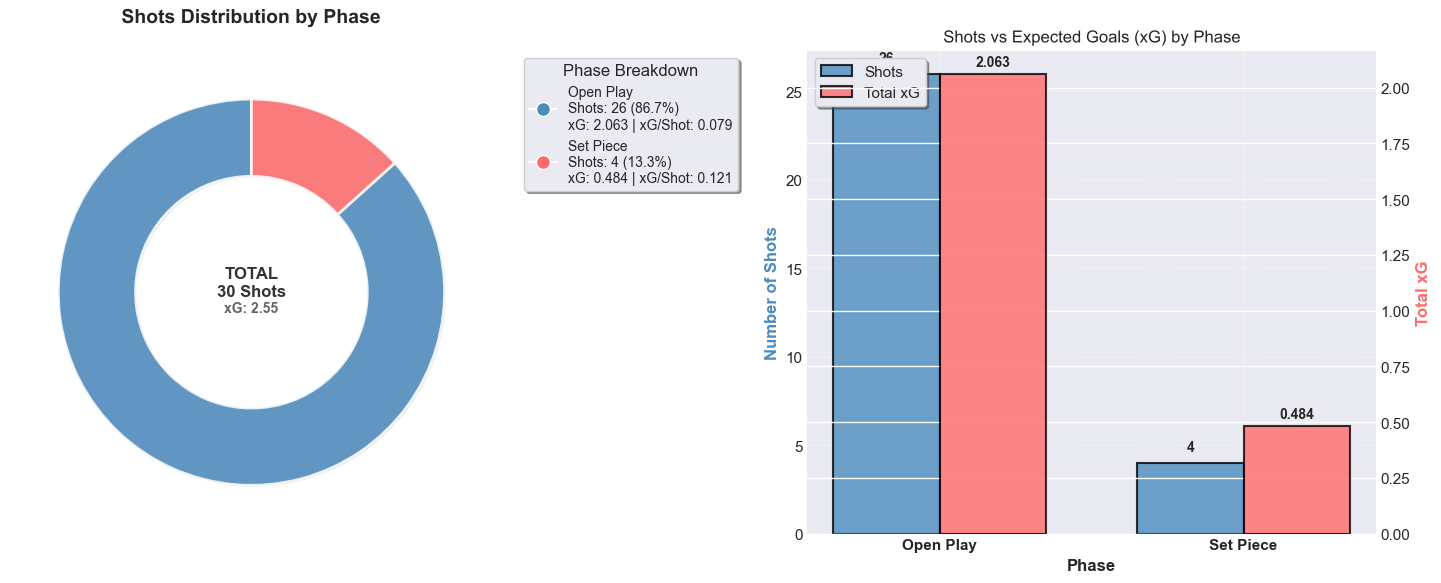


VISUALISASI 3: Efficiency Comparison


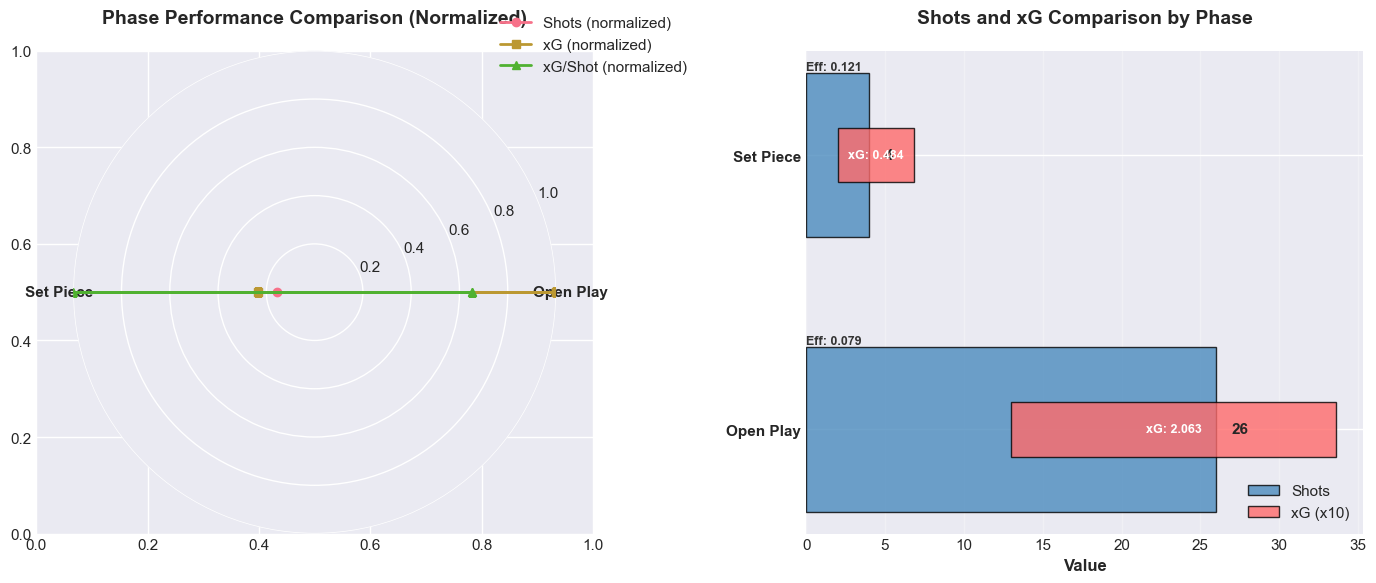


VISUALISASI 4: Infographic Summary


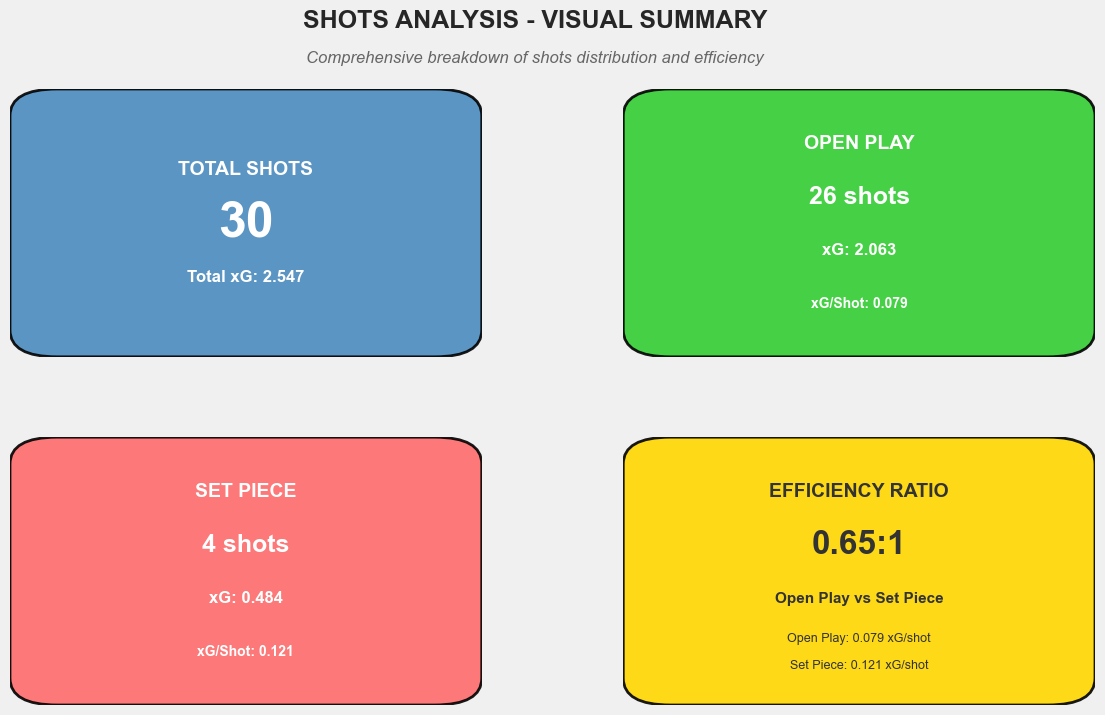


VISUALISASI 5: Modern Donut Chart with Percentages


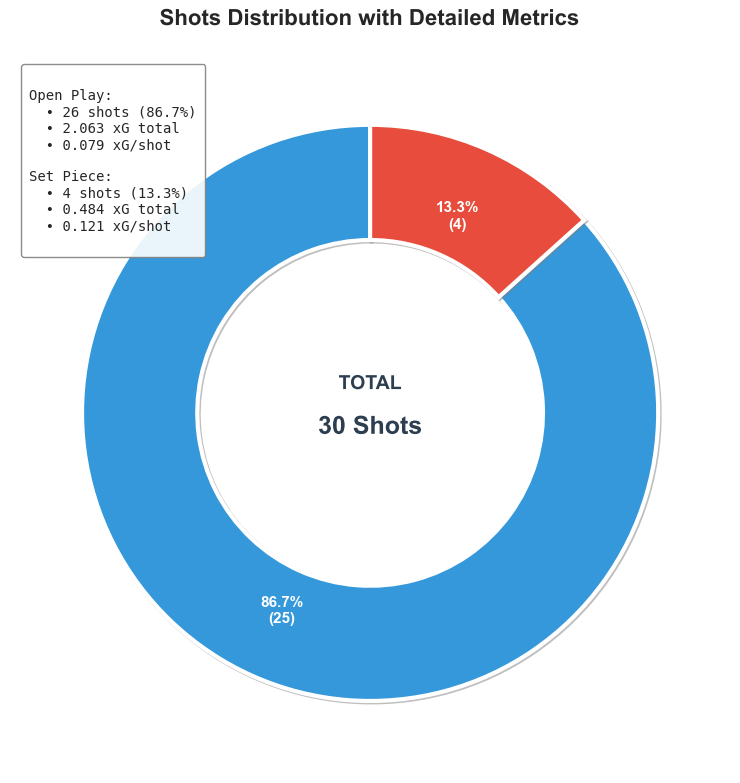


STATISTICAL INSIGHTS:

1. DISTRIBUTION:
   • Open Play: 26 shots (86.7%)
   • Set Piece: 4 shots (13.3%)

2. EXPECTED GOALS (xG):
   • Total xG: 2.547
   • Open Play xG: 2.063
   • Set Piece xG: 0.484

3. EFFICIENCY (xG per Shot):
   • Open Play: 0.079 xG/shot
   • Set Piece: 0.121 xG/shot

4. COMPARATIVE ANALYSIS:
   • Shot difference: 22 more shots from Open Play
   • xG difference: 1.579 more xG from Open Play
   • Efficiency difference: -0.042 xG/shot

5. KEY INSIGHTS:
   → Set Piece shots are MORE efficient than Open Play
   → Team heavily relies on Open Play for creating chances
   → 86.7% of all shots come from Open Play


In [94]:
]
})

# Hitung persentase
summary['percentage'] = (summary['shots'] / summary['shots'].sum() * 100).round(1)
summary['xg_per_shot'] = (summary['total_xg'] / summary['shots']).round(3)

print("Data Summary:")
print(summary)
print("\n" + "="*60)

# ==============================================
# VISUALISASI 1: DONUT CHART WITH ENHANCED DESIGN
# ==============================================
print("\nVISUALISASI 1: Enhanced Donut Chart")

fig = plt.figure(figsize=(15, 6))

# Subplot 1: Donut Chart yang lebih menarik
ax1 = plt.subplot(1, 2, 1)

# Warna yang lebih menarik
colors = ['#4B8BBE', '#FF6B6B']

# Donut chart dengan efek 3D
wedges, texts = ax1.pie(  # Hanya unpack 2 values
    summary['shots'],
    colors=colors,
    startangle=90,
    wedgeprops=dict(
        width=0.4,
        edgecolor='white',
        linewidth=2,
        alpha=0.85
    ),
    pctdistance=0.85
)

# Efek shadow untuk wedges
for wedge in wedges:
    wedge.set_path_effects([
        path_effects.withSimplePatchShadow(
            offset=(1, -1),
            shadow_rgbFace='gray',
            alpha=0.3
        )
    ])

# Custom text di tengah donut
center_circle = plt.Circle((0, 0), 0.2, color='white', linewidth=2, edgecolor='gray')
ax1.add_patch(center_circle)

# Info di tengah donut
total_shots = summary['shots'].sum()
total_xg = summary['total_xg'].sum()
ax1.text(0, 0.05, f'TOTAL\n{total_shots} Shots',
         ha='center', va='center', fontsize=12, fontweight='bold', color='#333')
ax1.text(0, -0.08, f'xG: {total_xg:.2f}',
         ha='center', va='center', fontsize=10, fontweight='bold', color='#666')

# Custom legend dengan info lengkap
legend_elements = []
for idx, row in summary.iterrows():
    element = plt.Line2D([0], [0], marker='o', color='w',
                        markerfacecolor=colors[idx], markersize=10,
                        label=f"{row['phase']}\n"
                              f"Shots: {row['shots']} ({row['percentage']}%)\n"
                              f"xG: {row['total_xg']:.3f} | xG/Shot: {row['xg_per_shot']:.3f}")
    legend_elements.append(element)

ax1.legend(handles=legend_elements, loc='upper left',
           bbox_to_anchor=(1.05, 1),
           title="Phase Breakdown",
           title_fontsize=12,
           fontsize=10,
           frameon=True,
           fancybox=True,
           shadow=True)

# Title dengan efek
title = ax1.set_title('Shots Distribution by Phase', fontsize=14, fontweight='bold', pad=20)
title.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

# ==============================================
# VISUALISASI 2: BAR CHART WITH ANNOTATIONS
# ==============================================
print("VISUALISASI 2: Bar Chart Comparison")

ax2 = plt.subplot(1, 2, 2)

# Data untuk bar chart
x = np.arange(len(summary))
width = 0.35

# Bar untuk shots
bars1 = ax2.bar(x - width/2, summary['shots'], width,
                label='Shots', color=colors[0], alpha=0.8,
                edgecolor='black', linewidth=1.5)

# Bar untuk total xG (skala berbeda)
ax2_twin = ax2.twinx()
bars2 = ax2_twin.bar(x + width/2, summary['total_xg'], width,
                     label='Total xG', color=colors[1], alpha=0.8,
                     edgecolor='black', linewidth=1.5)

# Anotasi untuk bars
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom',
             fontweight='bold', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax2_twin.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                  f'{height:.3f}', ha='center', va='bottom',
                  fontweight='bold', fontsize=10)

# Konfigurasi axes
ax2.set_xlabel('Phase', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Shots', fontsize=12, fontweight='bold', color=colors[0])
ax2_twin.set_ylabel('Total xG', fontsize=12, fontweight='bold', color=colors[1])

ax2.set_xticks(x)
ax2.set_xticklabels(summary['phase'], fontsize=11, fontweight='bold')

# Grid dan style
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

# Legend
bars = [bars1, bars2]
labels = ['Shots', 'Total xG']
ax2.legend(bars, labels, loc='upper left', frameon=True, fancybox=True, shadow=True)

ax2.set_title('Shots vs Expected Goals (xG) by Phase', fontsize=14, fontweight='bold', pad=20)

# Efek untuk judul
title2 = ax2.get_title()
ax2.set_title(title2)
ax2.title.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

plt.tight_layout()
plt.show()

# ==============================================
# VISUALISASI 3: GAUGE CHART (EFFICIENCY METER) - VERSI SIMPLIFIED
# ==============================================
print("\nVISUALISASI 3: Efficiency Comparison")

fig3, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Radar/Spider Chart untuk Perbandingan
ax3 = plt.subplot(1, 2, 1, polar=True)

# Data untuk radar chart
categories = summary['phase'].tolist()
N = len(categories)

# Nilai untuk setiap kategori (normalized)
values_shots = summary['shots'].tolist()
values_xg = summary['total_xg'].tolist()
values_efficiency = summary['xg_per_shot'].tolist()

# Normalisasi untuk radar chart (0-1 scale)
norm_shots = [v/max(values_shots) for v in values_shots]
norm_xg = [v/max(values_xg) for v in values_xg]
norm_eff = [v/max(values_efficiency) for v in values_efficiency]

# Sudut untuk setiap kategori
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Tutup lingkaran

# Plot untuk setiap metrik
norm_shots += norm_shots[:1]
norm_xg += norm_xg[:1]
norm_eff += norm_eff[:1]

ax3.plot(angles, norm_shots, 'o-', linewidth=2, label='Shots (normalized)')
ax3.fill(angles, norm_shots, alpha=0.25)
ax3.plot(angles, norm_xg, 's-', linewidth=2, label='xG (normalized)')
ax3.fill(angles, norm_xg, alpha=0.25)
ax3.plot(angles, norm_eff, '^-', linewidth=2, label='xG/Shot (normalized)')
ax3.fill(angles, norm_eff, alpha=0.25)

# Konfigurasi radar chart
ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(categories, fontsize=11, fontweight='bold')
ax3.set_ylim(0, 1)
ax3.grid(True)

ax3.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax3.set_title('Phase Performance Comparison (Normalized)', fontsize=14, fontweight='bold', pad=20)

# Subplot 2: Stacked Bar Chart
ax4 = plt.subplot(1, 2, 2)

# Data untuk stacked bar
x_pos = range(len(summary))
bar_height = 0.6

# Buat stacked bar
bars_shots = ax4.barh(x_pos, summary['shots'], height=bar_height,
                     color=colors[0], alpha=0.8, label='Shots',
                     edgecolor='black', linewidth=1)

bars_xg = ax4.barh(x_pos, summary['total_xg'] * 10, height=bar_height/3,
                  left=summary['shots']/2, color=colors[1], alpha=0.8, label='xG (x10)',
                  edgecolor='black', linewidth=1)

# Anotasi
for i, (shots, xg, eff) in enumerate(zip(summary['shots'], summary['total_xg'], summary['xg_per_shot'])):
    ax4.text(shots + 1, i, f'{shots}', va='center', fontweight='bold', fontsize=11)
    ax4.text(shots/2 + xg*10/2, i, f'xG: {xg:.3f}', va='center', ha='center',
            fontweight='bold', fontsize=9, color='white')
    ax4.text(0, i + bar_height/2, f'Eff: {eff:.3f}', va='bottom', ha='left',
            fontsize=9, fontweight='bold', color='#333')

ax4.set_yticks(x_pos)
ax4.set_yticklabels(summary['phase'], fontsize=11, fontweight='bold')
ax4.set_xlabel('Value', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')
ax4.set_axisbelow(True)
ax4.legend(loc='lower right')
ax4.set_title('Shots and xG Comparison by Phase', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# ==============================================
# VISUALISASI 4: INFOGRAPHIC STYLE SUMMARY
# ==============================================
print("\nVISUALISASI 4: Infographic Summary")

fig4 = plt.figure(figsize=(14, 8))
fig4.patch.set_facecolor('#f0f0f0')
gs = fig4.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Box 1: Total Stats
ax5 = fig4.add_subplot(gs[0, 0])
ax5.axis('off')

# Box style
box1 = FancyBboxPatch((0.1, 0.1), 0.8, 0.8,
                      boxstyle="round,pad=0.1",
                      facecolor='#4B8BBE',
                      alpha=0.9,
                      edgecolor='black',
                      linewidth=2)
ax5.add_patch(box1)

ax5.text(0.5, 0.7, 'TOTAL SHOTS', ha='center', va='center',
         fontsize=14, fontweight='bold', color='white')
ax5.text(0.5, 0.5, str(total_shots), ha='center', va='center',
         fontsize=36, fontweight='bold', color='white')
ax5.text(0.5, 0.3, f'Total xG: {total_xg:.3f}', ha='center', va='center',
         fontsize=12, fontweight='bold', color='white')

# Box 2: Open Play Stats
ax6 = fig4.add_subplot(gs[0, 1])
ax6.axis('off')

box2 = FancyBboxPatch((0.1, 0.1), 0.8, 0.8,
                      boxstyle="round,pad=0.1",
                      facecolor='#32CD32',
                      alpha=0.9,
                      edgecolor='black',
                      linewidth=2)
ax6.add_patch(box2)

open_play = summary[summary['phase'] == 'Open Play'].iloc[0]
ax6.text(0.5, 0.8, 'OPEN PLAY', ha='center', va='center',
         fontsize=14, fontweight='bold', color='white')
ax6.text(0.5, 0.6, f"{open_play['shots']} shots", ha='center', va='center',
         fontsize=18, fontweight='bold', color='white')
ax6.text(0.5, 0.4, f"xG: {open_play['total_xg']:.3f}", ha='center', va='center',
         fontsize=12, fontweight='bold', color='white')
ax6.text(0.5, 0.2, f"xG/Shot: {open_play['xg_per_shot']:.3f}", ha='center', va='center',
         fontsize=10, fontweight='bold', color='white')

# Box 3: Set Piece Stats
ax7 = fig4.add_subplot(gs[1, 0])
ax7.axis('off')

box3 = FancyBboxPatch((0.1, 0.1), 0.8, 0.8,
                      boxstyle="round,pad=0.1",
                      facecolor='#FF6B6B',
                      alpha=0.9,
                      edgecolor='black',
                      linewidth=2)
ax7.add_patch(box3)

set_piece = summary[summary['phase'] == 'Set Piece'].iloc[0]
ax7.text(0.5, 0.8, 'SET PIECE', ha='center', va='center',
         fontsize=14, fontweight='bold', color='white')
ax7.text(0.5, 0.6, f"{set_piece['shots']} shots", ha='center', va='center',
         fontsize=18, fontweight='bold', color='white')
ax7.text(0.5, 0.4, f"xG: {set_piece['total_xg']:.3f}", ha='center', va='center',
         fontsize=12, fontweight='bold', color='white')
ax7.text(0.5, 0.2, f"xG/Shot: {set_piece['xg_per_shot']:.3f}", ha='center', va='center',
         fontsize=10, fontweight='bold', color='white')

# Box 4: Efficiency Comparison
ax8 = fig4.add_subplot(gs[1, 1])
ax8.axis('off')

box4 = FancyBboxPatch((0.1, 0.1), 0.8, 0.8,
                      boxstyle="round,pad=0.1",
                      facecolor='#FFD700',
                      alpha=0.9,
                      edgecolor='black',
                      linewidth=2)
ax8.add_patch(box4)

efficiency_ratio = (open_play['xg_per_shot'] / set_piece['xg_per_shot']).round(2)
ax8.text(0.5, 0.8, 'EFFICIENCY RATIO', ha='center', va='center',
         fontsize=14, fontweight='bold', color='#333')
ax8.text(0.5, 0.6, f'{efficiency_ratio}:1', ha='center', va='center',
         fontsize=24, fontweight='bold', color='#333')
ax8.text(0.5, 0.4, 'Open Play vs Set Piece', ha='center', va='center',
         fontsize=11, fontweight='bold', color='#333')
ax8.text(0.5, 0.25, f"Open Play: {open_play['xg_per_shot']:.3f} xG/shot",
         ha='center', va='center', fontsize=9, color='#333')
ax8.text(0.5, 0.15, f"Set Piece: {set_piece['xg_per_shot']:.3f} xG/shot",
         ha='center', va='center', fontsize=9, color='#333')

# Title untuk infographic
fig4.suptitle('SHOTS ANALYSIS - VISUAL SUMMARY', fontsize=18, fontweight='bold', y=0.98)
fig4.text(0.5, 0.92, 'Comprehensive breakdown of shots distribution and efficiency',
          ha='center', va='center', fontsize=12, style='italic', color='#666')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ==============================================
# VISUALISASI 5: MODERN DONUT CHART WITH PERCENTAGES
# ==============================================
print("\nVISUALISASI 5: Modern Donut Chart with Percentages")

fig5, ax9 = plt.subplots(figsize=(8, 8))

# Warna gradient
colors_gradient = ['#3498db', '#e74c3c']

# Donut chart dengan percentage
wedges2, texts2, autotexts2 = ax9.pie(
    summary['shots'],
    colors=colors_gradient,
    startangle=90,
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100 * total_shots)})',
    pctdistance=0.75,
    wedgeprops=dict(
        width=0.4,
        edgecolor='white',
        linewidth=3,
        linestyle='-'
    ),
    textprops=dict(
        color="white",
        fontsize=11,
        fontweight='bold'
    )
)

# Highlight dengan efek glow
for wedge in wedges2:
    wedge.set_path_effects([
        path_effects.SimpleLineShadow(offset=(1, -1), shadow_color='gray', alpha=0.5),
        path_effects.Normal()
    ])

# Center circle dengan efek gradient
center_gradient = plt.Circle((0, 0), 0.2, color='white', 
                            edgecolor='gray', linewidth=2,
                            linestyle='--', alpha=0.9)
ax9.add_patch(center_gradient)

# Info di tengah dengan efek
ax9.text(0, 0.1, 'TOTAL', ha='center', va='center',
        fontsize=14, fontweight='bold', color='#2c3e50',
        path_effects=[path_effects.withStroke(linewidth=3, foreground='white')])
ax9.text(0, -0.05, f'{total_shots} Shots', ha='center', va='center',
        fontsize=18, fontweight='bold', color='#2c3e50',
        path_effects=[path_effects.withStroke(linewidth=3, foreground='white')])

# Legend dengan box yang menarik
from matplotlib.offsetbox import AnchoredText

legend_text = f"""
Open Play:
  • {summary.loc[0, 'shots']} shots ({summary.loc[0, 'percentage']}%)
  • {summary.loc[0, 'total_xg']:.3f} xG total
  • {summary.loc[0, 'xg_per_shot']:.3f} xG/shot

Set Piece:
  • {summary.loc[1, 'shots']} shots ({summary.loc[1, 'percentage']}%)
  • {summary.loc[1, 'total_xg']:.3f} xG total
  • {summary.loc[1, 'xg_per_shot']:.3f} xG/shot
"""

anchored_text = AnchoredText(legend_text, loc='upper left',
                            frameon=True, borderpad=1,
                            prop=dict(size=10, family='monospace'))
anchored_text.patch.set_boxstyle("round,pad=0.2")
anchored_text.patch.set_facecolor('white')
anchored_text.patch.set_alpha(0.9)
anchored_text.patch.set_edgecolor('gray')
ax9.add_artist(anchored_text)

ax9.set_title('Shots Distribution with Detailed Metrics', 
             fontsize=16, fontweight='bold', pad=20,
             path_effects=[path_effects.withStroke(linewidth=3, foreground='white')])

plt.tight_layout()
plt.show()

# ==============================================
# OUTPUT STATISTICAL INSIGHTS
# ==============================================
print("\n" + "="*60)
print("STATISTICAL INSIGHTS:")
print("="*60)

print(f"\n1. DISTRIBUTION:")
print(f"   • Open Play: {summary.loc[0, 'shots']} shots ({summary.loc[0, 'percentage']}%)")
print(f"   • Set Piece: {summary.loc[1, 'shots']} shots ({summary.loc[1, 'percentage']}%)")

print(f"\n2. EXPECTED GOALS (xG):")
print(f"   • Total xG: {total_xg:.3f}")
print(f"   • Open Play xG: {summary.loc[0, 'total_xg']:.3f}")
print(f"   • Set Piece xG: {summary.loc[1, 'total_xg']:.3f}")

print(f"\n3. EFFICIENCY (xG per Shot):")
print(f"   • Open Play: {summary.loc[0, 'xg_per_shot']:.3f} xG/shot")
print(f"   • Set Piece: {summary.loc[1, 'xg_per_shot']:.3f} xG/shot")

# Hitung perbedaan
shot_diff = summary.loc[0, 'shots'] - summary.loc[1, 'shots']
xg_diff = summary.loc[0, 'total_xg'] - summary.loc[1, 'total_xg']
efficiency_diff = summary.loc[0, 'xg_per_shot'] - summary.loc[1, 'xg_per_shot']

print(f"\n4. COMPARATIVE ANALYSIS:")
print(f"   • Shot difference: {shot_diff} more shots from Open Play")
print(f"   • xG difference: {xg_diff:.3f} more xG from Open Play")
print(f"   • Efficiency difference: {efficiency_diff:.3f} xG/shot")

# Insight berdasarkan data
print(f"\n5. KEY INSIGHTS:")
if summary.loc[0, 'xg_per_shot'] > summary.loc[1, 'xg_per_shot']:
    print(f"   → Open Play shots are MORE efficient than Set Pieces")
    efficiency_advantage = (summary.loc[0, 'xg_per_shot'] / summary.loc[1, 'xg_per_shot'] - 1) * 100
    print(f"   → Efficiency advantage: {efficiency_advantage:.1f}% more efficient")
else:
    print(f"   → Set Piece shots are MORE efficient than Open Play")

if summary.loc[0, 'percentage'] > 70:
    print(f"   → Team heavily relies on Open Play for creating chances")
    print(f"   → {summary.loc[0, 'percentage']}% of all shots come from Open Play")
else:
    print(f"   → Team has balanced approach between Open Play and Set Pieces")